# Graphene Reciprocal Lattice Visualization

This notebook provides a comprehensive, step-by-step visualization of the construction of graphene's reciprocal lattice. We will start from the real space lattice structure and systematically build up to the reciprocal space, Brillouin zone, and high symmetry points.

## Overview
1. **Real Space Lattice**: Define and visualize graphene's honeycomb lattice
2. **Unit Cell**: Identify the primitive unit cell and sublattices
3. **Reciprocal Lattice Vectors**: Calculate and derive reciprocal space vectors
4. **Reciprocal Space**: Construct the complete reciprocal lattice
5. **Brillouin Zone**: Define the first Brillouin zone
6. **High Symmetry Points**: Mark important points (Γ, K, K', M)
7. **Interactive Visualization**: Combine all elements for comprehensive understanding

## 1. Import Required Libraries

We'll import all necessary libraries for mathematical calculations and visualizations.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import math

# Set up matplotlib for high-quality plots
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

print("All libraries imported successfully!")

All libraries imported successfully!


In [15]:
# Graphene lattice parameters
a = 2.46  # Lattice constant in Angstroms
bond_length = a / np.sqrt(3)  # C-C bond length

# Real space primitive lattice vectors
a1 = np.array([3*bond_length/2, bond_length*np.sqrt(3)/2])  # First primitive vector
a2 = np.array([3*bond_length/2, -bond_length*np.sqrt(3)/2])  # Second primitive vector

print(f"Lattice constant a = {a:.2f} Å")
print(f"C-C bond length = {bond_length:.2f} Å")
print(f"Lattice vector a₁ = ({a1[0]:.2f}, {a1[1]:.2f})")
print(f"Lattice vector a₂ = ({a2[0]:.2f}, {a2[1]:.2f})")
print(f"Magnitude |a₁| = {np.linalg.norm(a1):.2f} Å")
print(f"Magnitude |a₂| = {np.linalg.norm(a2):.2f} Å")
print(f"Angle between a₁ and a₂ = {np.degrees(np.arccos(np.dot(a1, a2)/(np.linalg.norm(a1)*np.linalg.norm(a2)))):.1f}°")

# Calculate area of unit cell
unit_cell_area = abs(a1[0] * a2[1] - a1[1] * a2[0])  # 2D cross product: |a1 × a2|
print(f"Unit cell area = {unit_cell_area:.2f} Å²")

Lattice constant a = 2.46 Å
C-C bond length = 1.42 Å
Lattice vector a₁ = (2.13, 1.23)
Lattice vector a₂ = (2.13, -1.23)
Magnitude |a₁| = 2.46 Å
Magnitude |a₂| = 2.46 Å
Angle between a₁ and a₂ = 60.0°
Unit cell area = 5.24 Å²


## 3. Visualize Real Space Lattice Structure

Let's create a detailed visualization of the graphene honeycomb lattice structure, showing:
- Carbon atoms (A and B sublattices)
- Primitive lattice vectors a₁ and a₂
- Multiple unit cells to show the periodic structure

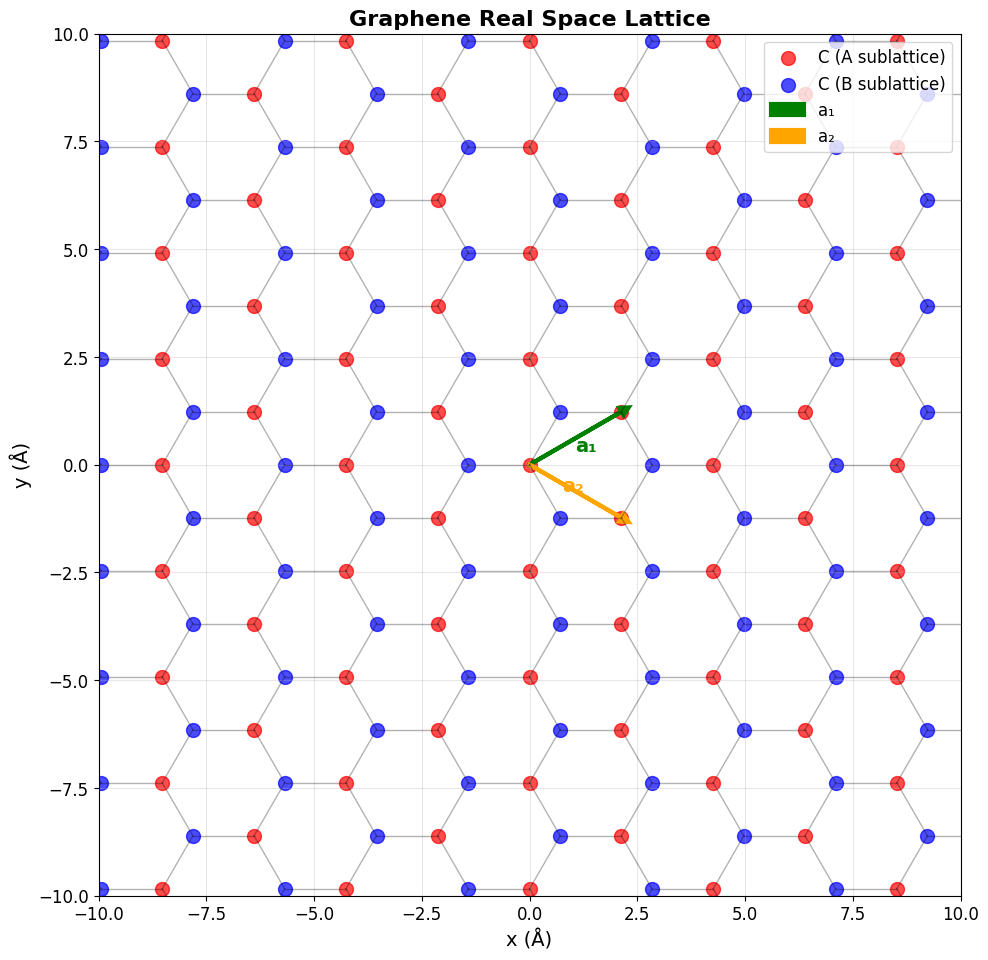

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Graphene Real Space Lattice'}, xlabel='x (Å)', ylabel='y (Å)'>)

In [3]:
def plot_graphene_lattice(n_cells=7, show_vectors=True, title="Graphene Real Space Lattice"):
    """Plot the graphene honeycomb lattice structure"""
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # Basis vectors for the two carbon atoms in the unit cell
    delta3 = np.array([-bond_length, 0])
    delta2 = np.array([bond_length/2, bond_length*np.sqrt(3)/2])
    delta1 = np.array([bond_length/2, -bond_length*np.sqrt(3)/2])
    
    # Store all atom positions
    atoms_A = []  # Sublattice A
    atoms_B = []  # Sublattice B
    
    # Generate lattice points
    for i in range(-n_cells, n_cells+1):
        for j in range(-n_cells, n_cells+1):
            # Lattice point
            R = i * a1 + j * a2
            
            # Position of atom A (at lattice point)
            pos_A = R
            atoms_A.append(pos_A)
            
            # Positions of atom B (connected to A)
            pos_B1 = R + delta1
            pos_B2 = R + delta2
            pos_B3 = R + delta3
            atoms_B.extend([pos_B1, pos_B2, pos_B3])
    
    # Remove duplicates (approximately)
    def remove_duplicates(points, tolerance=0.1):
        unique_points = []
        for point in points:
            is_duplicate = False
            for unique_point in unique_points:
                if np.linalg.norm(point - unique_point) < tolerance:
                    is_duplicate = True
                    break
            if not is_duplicate:
                unique_points.append(point)
        return unique_points
    
    atoms_A = remove_duplicates(atoms_A)
    atoms_B = remove_duplicates(atoms_B)
    
    # Plot carbon atoms
    for atom in atoms_A:
        ax.scatter(atom[0], atom[1], c='red', s=100, alpha=0.7, label='C (A sublattice)' if atom is atoms_A[0] else "")
    
    for atom in atoms_B:
        ax.scatter(atom[0], atom[1], c='blue', s=100, alpha=0.7, label='C (B sublattice)' if atom is atoms_B[0] else "")
    
    # Draw bonds
    for atom_A in atoms_A:
        for atom_B in atoms_B:
            distance = np.linalg.norm(atom_A - atom_B)
            if abs(distance - bond_length) < 0.1:  # Within tolerance
                ax.plot([atom_A[0], atom_B[0]], [atom_A[1], atom_B[1]], 'k-', alpha=0.3, linewidth=1)
    
    # Plot lattice vectors if requested
    if show_vectors:
        origin = np.array([0, 0])
        ax.arrow(origin[0], origin[1], a1[0], a1[1], head_width=0.2, head_length=0.2, 
                fc='green', ec='green', linewidth=3, label='a₁')
        ax.arrow(origin[0], origin[1], a2[0], a2[1], head_width=0.2, head_length=0.2, 
                fc='orange', ec='orange', linewidth=3, label='a₂')
        
        # Add vector labels
        ax.text(a1[0]/2, a1[1]/2 - 0.3, 'a₁', fontsize=14, fontweight='bold', color='green')
        ax.text(a2[0]/2 - 0.3, a2[1]/2, 'a₂', fontsize=14, fontweight='bold', color='orange')
    
    ax.set_xlabel('x (Å)', fontsize=14)
    ax.set_ylabel('y (Å)', fontsize=14)
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.legend(loc='upper right')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    
    # Set consistent axis limits for all figures
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax

# Plot the graphene lattice
plot_graphene_lattice(n_cells=7, show_vectors=True)

## 4. Define and Visualize Unit Cell

The primitive unit cell of graphene contains **two carbon atoms** (one from each sublattice A and B). Let's highlight this unit cell and show the atomic positions within it. Understanding the unit cell is crucial before constructing the reciprocal lattice.

Unit Cell Properties:
Lattice vectors: a₁ = (2.13, 1.23) Å
                a₂ = (2.13, -1.23) Å
Unit cell area: 5.24 Å²
Number of atoms per unit cell: 2
Atomic positions in unit cell:
  Atom A (red): (0.00, 0.00)
  Atom B (blue): (1.42, 0.00)
Note: Unit cell boundary is shifted left by 1.42 Å to show atoms inside cell



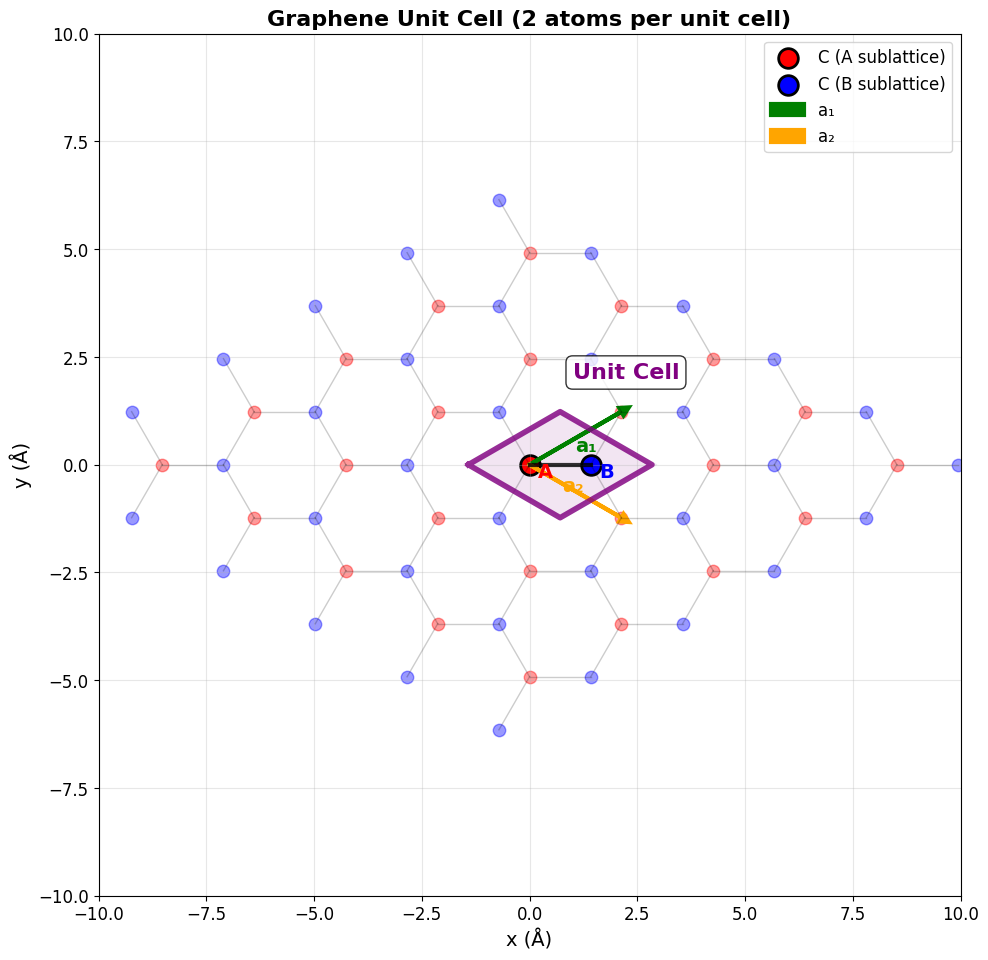

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Graphene Unit Cell (2 atoms per unit cell)'}, xlabel='x (Å)', ylabel='y (Å)'>)

In [4]:
def plot_unit_cell():
    """Plot the graphene lattice with highlighted unit cell"""
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # Plot the lattice structure first (reduced visibility)
    n_cells = 2
    delta1 = np.array([bond_length, 0])
    delta2 = np.array([-bond_length/2, bond_length*np.sqrt(3)/2])
    delta3 = np.array([-bond_length/2, -bond_length*np.sqrt(3)/2])
    
    atoms_A = []
    atoms_B = []
    
    for i in range(-n_cells, n_cells+1):
        for j in range(-n_cells, n_cells+1):
            R = i * a1 + j * a2
            pos_A = R
            atoms_A.append(pos_A)
            atoms_B.extend([R + delta1, R + delta2, R + delta3])
    
    # Remove duplicates
    def remove_duplicates(points, tolerance=0.1):
        unique_points = []
        for point in points:
            is_duplicate = False
            for unique_point in unique_points:
                if np.linalg.norm(point - unique_point) < tolerance:
                    is_duplicate = True
                    break
            if not is_duplicate:
                unique_points.append(point)
        return unique_points
    
    atoms_A = remove_duplicates(atoms_A)
    atoms_B = remove_duplicates(atoms_B)
    
    # Plot all atoms with reduced opacity
    for atom in atoms_A:
        ax.scatter(atom[0], atom[1], c='red', s=80, alpha=0.4)
    for atom in atoms_B:
        ax.scatter(atom[0], atom[1], c='blue', s=80, alpha=0.4)
    
    # Draw all bonds with reduced opacity
    for atom_A in atoms_A:
        for atom_B in atoms_B:
            distance = np.linalg.norm(atom_A - atom_B)
            if abs(distance - bond_length) < 0.1:
                ax.plot([atom_A[0], atom_B[0]], [atom_A[1], atom_B[1]], 'k-', alpha=0.2, linewidth=1)
    
    # Highlight the unit cell (shifted left by 1 bond length)
    unit_cell_origin = np.array([-bond_length, 0])
    unit_cell_corners = np.array([unit_cell_origin, unit_cell_origin + a1, unit_cell_origin + a1 + a2, unit_cell_origin + a2, unit_cell_origin])
    ax.plot(unit_cell_corners[:, 0], unit_cell_corners[:, 1], 'purple', linewidth=4, alpha=0.8)
    
    # Fill the unit cell with transparent color
    unit_cell_patch = Polygon(unit_cell_corners[:-1], alpha=0.1, facecolor='purple', edgecolor='purple', linewidth=4)
    ax.add_patch(unit_cell_patch)
    
    # Highlight atoms in the unit cell (keeping original positions)
    # Atom A at origin
    ax.scatter(0, 0, c='red', s=200, alpha=1.0, edgecolors='black', linewidth=2, label='C (A sublattice)')
    
    # Atom B at delta1 position
    pos_B = delta1
    ax.scatter(pos_B[0], pos_B[1], c='blue', s=200, alpha=1.0, edgecolors='black', linewidth=2, label='C (B sublattice)')
    
    # Draw the bond between A and B in the unit cell
    ax.plot([0, pos_B[0]], [0, pos_B[1]], 'k-', linewidth=3, alpha=0.8)
    
    # Plot lattice vectors
    ax.arrow(0, 0, a1[0], a1[1], head_width=0.2, head_length=0.2, 
             fc='green', ec='green', linewidth=3, label='a₁')
    ax.arrow(0, 0, a2[0], a2[1], head_width=0.2, head_length=0.2, 
             fc='orange', ec='orange', linewidth=3, label='a₂')
    
    # Add labels
    ax.text(a1[0]/2, a1[1]/2 - 0.3, 'a₁', fontsize=14, fontweight='bold', color='green')
    ax.text(a2[0]/2 - 0.3, a2[1]/2, 'a₂', fontsize=14, fontweight='bold', color='orange')
    ax.text(1, 2, 'Unit Cell', fontsize=16, fontweight='bold', color='purple',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    
    # Add atomic position labels
    ax.text(0.2, -0.3, 'A', fontsize=14, fontweight='bold', color='red')
    ax.text(pos_B[0]+0.2, pos_B[1]-0.3, 'B', fontsize=14, fontweight='bold', color='blue')
    
    ax.set_xlabel('x (Å)', fontsize=14)
    ax.set_ylabel('y (Å)', fontsize=14)
    ax.set_title('Graphene Unit Cell (2 atoms per unit cell)', fontsize=16, fontweight='bold')
    ax.legend(loc='upper right')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    
    # Set consistent axis limits for all figures
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax

# Calculate and display unit cell properties
print("Unit Cell Properties:")
print(f"Lattice vectors: a₁ = ({a1[0]:.2f}, {a1[1]:.2f}) Å")
print(f"                a₂ = ({a2[0]:.2f}, {a2[1]:.2f}) Å")
print(f"Unit cell area: {unit_cell_area:.2f} Å²")
print(f"Number of atoms per unit cell: 2")
print(f"Atomic positions in unit cell:")
print(f"  Atom A (red): (0.00, 0.00)")
print(f"  Atom B (blue): ({bond_length:.2f}, 0.00)")
print(f"Note: Unit cell boundary is shifted left by {bond_length:.2f} Å to show atoms inside cell")
print()

plot_unit_cell()

## 5. Calculate Reciprocal Lattice Vectors

The reciprocal lattice vectors are defined by the orthogonality condition:
**aᵢ · bⱼ = 2π δᵢⱼ**

For a 2D lattice, the reciprocal lattice vectors are:
- **b₁** = 2π (a₂ × ẑ) / (a₁ · (a₂ × ẑ))
- **b₂** = 2π (ẑ × a₁) / (a₁ · (a₂ × ẑ))

where ẑ is the unit vector perpendicular to the 2D plane.

In [16]:
# Calculate reciprocal lattice vectors
def calculate_reciprocal_vectors(a1, a2):
    """Calculate reciprocal lattice vectors for 2D lattice"""
    # For 2D lattice, we use the cross product in 2D (which gives the z-component)
    # The area of the unit cell is |a1 × a2|
    area = a1[0] * a2[1] - a1[1] * a2[0]  # 2D cross product: a1 × a2
    
    # Reciprocal lattice vectors
    b1 = 2 * np.pi * np.array([a2[1], -a2[0]]) / area
    b2 = 2 * np.pi * np.array([-a1[1], a1[0]]) / area
    
    return b1, b2, area

# Calculate reciprocal lattice vectors
b1, b2, area = calculate_reciprocal_vectors(a1, a2)

print("Reciprocal Lattice Calculation:")
print("="*50)
print(f"Real space lattice vectors:")
print(f"  a₁ = ({a1[0]:.3f}, {a1[1]:.3f}) Å")
print(f"  a₂ = ({a2[0]:.3f}, {a2[1]:.3f}) Å")
print(f"  Unit cell area = {area:.3f} Å²")
print()
print(f"Reciprocal lattice vectors:")
print(f"  b₁ = ({b1[0]:.3f}, {b1[1]:.3f}) Å⁻¹")
print(f"  b₂ = ({b2[0]:.3f}, {b2[1]:.3f}) Å⁻¹")
print(f"  |b₁| = {np.linalg.norm(b1):.3f} Å⁻¹")
print(f"  |b₂| = {np.linalg.norm(b2):.3f} Å⁻¹")
print()

# Verify orthogonality conditions
print("Verification of orthogonality conditions (aᵢ · bⱼ = 2π δᵢⱼ):")
dot_a1_b1 = np.dot(a1, b1)
dot_a1_b2 = np.dot(a1, b2)
dot_a2_b1 = np.dot(a2, b1)
dot_a2_b2 = np.dot(a2, b2)

print(f"  a₁ · b₁ = {dot_a1_b1:.6f} (should be 2π = {2*np.pi:.6f})")
print(f"  a₁ · b₂ = {dot_a1_b2:.6f} (should be 0)")
print(f"  a₂ · b₁ = {dot_a2_b1:.6f} (should be 0)")
print(f"  a₂ · b₂ = {dot_a2_b2:.6f} (should be 2π = {2*np.pi:.6f})")

# Calculate angle between reciprocal vectors
angle_b = np.degrees(np.arccos(np.dot(b1, b2)/(np.linalg.norm(b1)*np.linalg.norm(b2))))
print(f"  Angle between b₁ and b₂ = {angle_b:.1f}°")

# Reciprocal unit cell area
reciprocal_area = abs(b1[0] * b2[1] - b1[1] * b2[0])  # 2D cross product: |b1 × b2|
print(f"  Reciprocal unit cell area = {reciprocal_area:.6f} Å⁻²")
print(f"  Real × Reciprocal area = {abs(area * reciprocal_area):.6f} (should be (2π)² = {(2*np.pi)**2:.6f})")

Reciprocal Lattice Calculation:
Real space lattice vectors:
  a₁ = (2.130, 1.230) Å
  a₂ = (2.130, -1.230) Å
  Unit cell area = -5.241 Å²

Reciprocal lattice vectors:
  b₁ = (1.475, 2.554) Å⁻¹
  b₂ = (1.475, -2.554) Å⁻¹
  |b₁| = 2.949 Å⁻¹
  |b₂| = 2.949 Å⁻¹

Verification of orthogonality conditions (aᵢ · bⱼ = 2π δᵢⱼ):
  a₁ · b₁ = 6.283185 (should be 2π = 6.283185)
  a₁ · b₂ = 0.000000 (should be 0)
  a₂ · b₁ = 0.000000 (should be 0)
  a₂ · b₂ = 6.283185 (should be 2π = 6.283185)
  Angle between b₁ and b₂ = 120.0°
  Reciprocal unit cell area = 7.532843 Å⁻²
  Real × Reciprocal area = 39.478418 (should be (2π)² = 39.478418)


## 6. Overlay Reciprocal Vectors on Real Space

Now let's visualize both the real space lattice vectors (a₁, a₂) and the reciprocal lattice vectors (b₁, b₂) together to understand their relationship. The reciprocal vectors will be scaled for better visualization since they have different units.

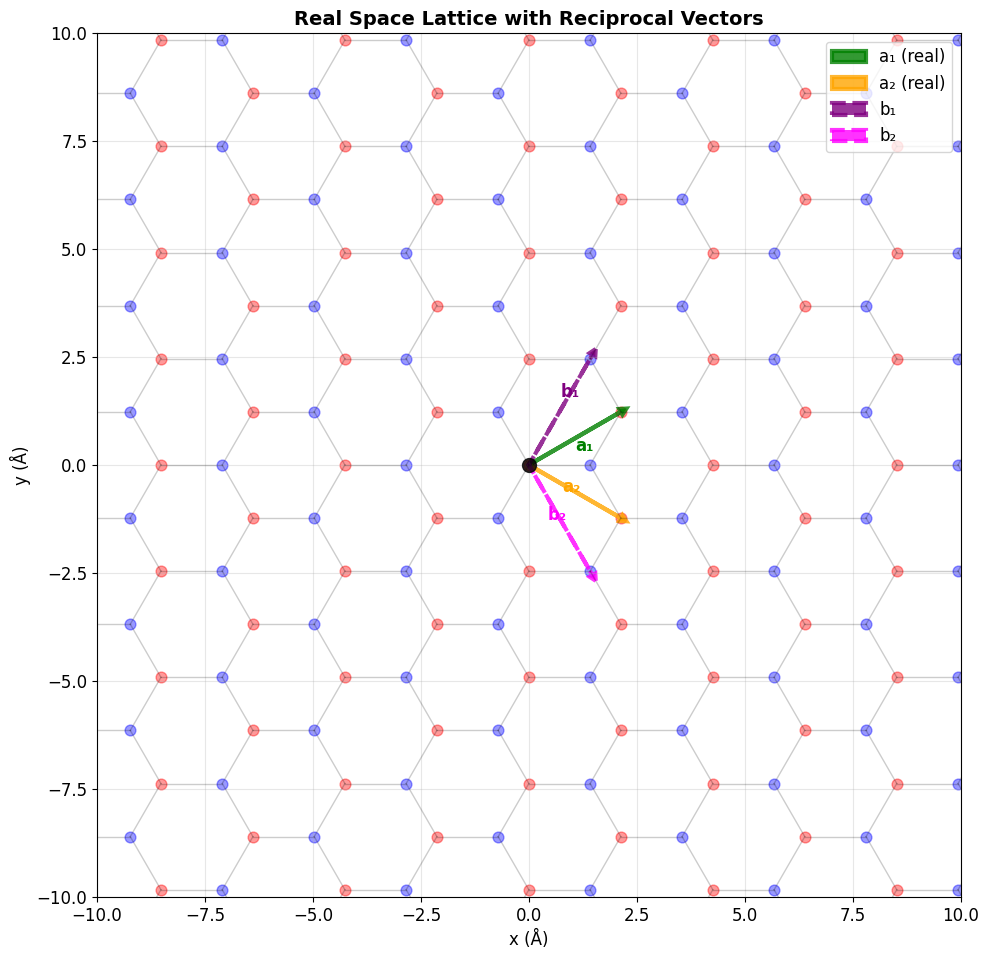

Key Relationships between Real and Reciprocal Space:
• Real space vectors make 60.0° angle
• Reciprocal vectors make 120.0° angle
• |a₁| = 2.46 Å,  |b₁| = 2.95 Å⁻¹
• |a₂| = 2.46 Å,  |b₂| = 2.95 Å⁻¹
• The reciprocal lattice rotates the vectors relative to real space
• Reciprocal vectors are perpendicular to opposite real space vectors
• Both lattices now share the same origin at (0, 0)


In [6]:
def plot_real_and_reciprocal_overlay():
    """Plot real space lattice with reciprocal vectors overlaid"""
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # === SINGLE PLOT: Real space with reciprocal vectors ===
    n_cells = 7
    delta1 = np.array([bond_length, 0])
    delta2 = np.array([-bond_length/2, bond_length*np.sqrt(3)/2])
    delta3 = np.array([-bond_length/2, -bond_length*np.sqrt(3)/2])
    
    # Plot real space lattice (simplified)
    atoms_A = []
    atoms_B = []
    
    for i in range(-n_cells, n_cells+1):
        for j in range(-n_cells, n_cells+1):
            R = i * a1 + j * a2
            atoms_A.append(R)
            atoms_B.append(R + delta1)
    
    # Plot atoms with reduced opacity
    for atom in atoms_A:
        ax.scatter(atom[0], atom[1], c='red', s=60, alpha=0.4)
    for atom in atoms_B:
        ax.scatter(atom[0], atom[1], c='blue', s=60, alpha=0.4)
    
    # Draw some bonds
    for atom_A in atoms_A:
        for atom_B in atoms_B:
            distance = np.linalg.norm(atom_A - atom_B)
            if abs(distance - bond_length) < 0.1:
                ax.plot([atom_A[0], atom_B[0]], [atom_A[1], atom_B[1]], 'k-', alpha=0.2, linewidth=1)
    
    # Plot real space lattice vectors from origin
    real_origin = np.array([0, 0])
    ax.arrow(real_origin[0], real_origin[1], a1[0], a1[1], head_width=0.15, head_length=0.15, 
              fc='green', ec='green', linewidth=3, alpha=0.8, label='a₁ (real)')
    ax.arrow(real_origin[0], real_origin[1], a2[0], a2[1], head_width=0.15, head_length=0.15, 
              fc='orange', ec='orange', linewidth=3, alpha=0.8, label='a₂ (real)')
    
    # Plot reciprocal lattice vectors from same origin (0,0)
    reciprocal_origin = np.array([0, 0])  # Changed: now same as real origin
    ax.arrow(reciprocal_origin[0], reciprocal_origin[1], b1[0], b1[1], head_width=0.15, head_length=0.15, 
              fc='purple', ec='purple', linewidth=3, alpha=0.8, linestyle='--', label='b₁')
    ax.arrow(reciprocal_origin[0], reciprocal_origin[1], b2[0], b2[1], head_width=0.15, head_length=0.15, 
              fc='magenta', ec='magenta', linewidth=3, alpha=0.8, linestyle='--', label='b₂')
    
    # Add labels
    ax.text(a1[0]/2, a1[1]/2 - 0.3, 'a₁', fontsize=12, fontweight='bold', color='green')
    ax.text(a2[0]/2 - 0.3, a2[1]/2, 'a₂', fontsize=12, fontweight='bold', color='orange')
    ax.text(b1[0]/2, b1[1]/2 + 0.3, 'b₁', fontsize=12, fontweight='bold', color='purple')
    ax.text(b2[0]/2 - 0.3, b2[1]/2, 'b₂', fontsize=12, fontweight='bold', color='magenta')
    
    # Mark the common origin
    ax.scatter(real_origin[0], real_origin[1], c='black', s=100, marker='o', alpha=0.8, zorder=10)
    
    ax.set_xlabel('x (Å)', fontsize=12)
    ax.set_ylabel('y (Å)', fontsize=12)
    ax.set_title('Real Space Lattice with Reciprocal Vectors', fontsize=14, fontweight='bold')
    ax.legend(loc='upper right')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    
    # Set consistent axis limits for all figures
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax

plot_real_and_reciprocal_overlay()

# Display important relationships
print("Key Relationships between Real and Reciprocal Space:")
print("="*55)
print(f"• Real space vectors make {np.degrees(np.arccos(np.dot(a1, a2)/(np.linalg.norm(a1)*np.linalg.norm(a2)))):.1f}° angle")
print(f"• Reciprocal vectors make {np.degrees(np.arccos(np.dot(b1, b2)/(np.linalg.norm(b1)*np.linalg.norm(b2)))):.1f}° angle")
print(f"• |a₁| = {np.linalg.norm(a1):.2f} Å,  |b₁| = {np.linalg.norm(b1):.2f} Å⁻¹")
print(f"• |a₂| = {np.linalg.norm(a2):.2f} Å,  |b₂| = {np.linalg.norm(b2):.2f} Å⁻¹")
print(f"• The reciprocal lattice rotates the vectors relative to real space")
print(f"• Reciprocal vectors are perpendicular to opposite real space vectors")
print(f"• Both lattices now share the same origin at (0, 0)")

## 7. Overlay Complete Reciprocal Lattice on Section 6 Figure

Now we'll extend the visualization from Section 6 by adding the complete reciprocal lattice as an overlay. We'll show how the reciprocal lattice can be shifted to have its origin at any reciprocal lattice point, demonstrating the periodicity of reciprocal space. Each point G = m₁b₁ + m₂b₂ (where m₁, m₂ are integers) represents a reciprocal lattice point.

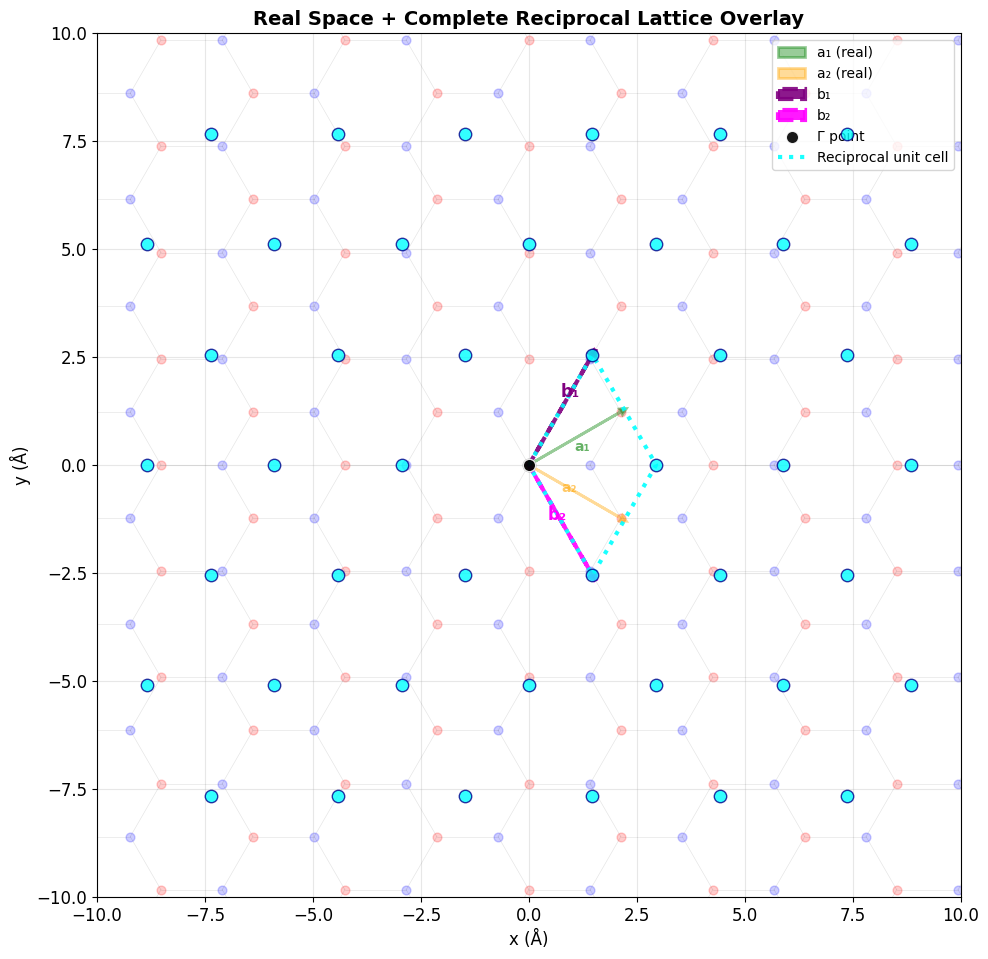

Reciprocal Lattice Overlay Analysis:
Reciprocal lattice vectors:
  b₁ = (1.475, 2.554) Å⁻¹
  b₂ = (1.475, -2.554) Å⁻¹
  |b₁| = 2.949 Å⁻¹
  |b₂| = 2.949 Å⁻¹
Reciprocal unit cell area = 7.532843 Å⁻²

Overlay Configuration:
• Both real space and reciprocal lattice origins at: (0, 0)
• No shift applied - direct overlay at common origin
• Both lattices coexist in the same coordinate system

Key Insights from the Overlay:
✓ Complete reciprocal lattice overlaid on real space
✓ Both lattices share the same origin for direct comparison
✓ The lattice structure demonstrates periodicity
✓ This configuration is standard for k-space analysis
✓ Electronic properties repeat with reciprocal lattice periodicity

Physical significance:
• Reciprocal lattice points represent allowed k-values
• Γ point at origin is the center of the Brillouin zone
• Brillouin zone construction centers around the origin
• This demonstrates the natural k-space coordinate system


C:\Users\xuli\AppData\Local\Temp\ipykernel_23540\3019098292.py:111: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  print(f"Reciprocal unit cell area = {abs(np.cross(b1, b2)):.6f} Å⁻²")


In [ ]:
def plot_extended_real_reciprocal_overlay():
    """Continue from Section 6 and add complete reciprocal lattice overlay"""
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # === SINGLE PLOT: Real space with complete reciprocal lattice overlay ===
    n_cells = 7
    delta1 = np.array([bond_length, 0])
    delta2 = np.array([-bond_length/2, bond_length*np.sqrt(3)/2])
    delta3 = np.array([-bond_length/2, -bond_length*np.sqrt(3)/2])
    
    # Plot real space lattice (simplified and more transparent)
    atoms_A = []
    atoms_B = []
    
    for i in range(-n_cells, n_cells+1):
        for j in range(-n_cells, n_cells+1):
            R = i * a1 + j * a2
            atoms_A.append(R)
            atoms_B.append(R + delta1)
    
    # Plot atoms with very low opacity
    for atom in atoms_A:
        ax.scatter(atom[0], atom[1], c='red', s=40, alpha=0.2)
    for atom in atoms_B:
        ax.scatter(atom[0], atom[1], c='blue', s=40, alpha=0.2)
    
    # Draw some bonds with very low opacity
    for atom_A in atoms_A:
        for atom_B in atoms_B:
            distance = np.linalg.norm(atom_A - atom_B)
            if abs(distance - bond_length) < 0.1:
                ax.plot([atom_A[0], atom_B[0]], [atom_A[1], atom_B[1]], 'k-', alpha=0.1, linewidth=0.5)
    
    # Plot real space lattice vectors from origin (more transparent)
    real_origin = np.array([0, 0])
    ax.arrow(real_origin[0], real_origin[1], a1[0], a1[1], head_width=0.15, head_length=0.15, 
              fc='green', ec='green', linewidth=2, alpha=0.4, label='a₁ (real)')
    ax.arrow(real_origin[0], real_origin[1], a2[0], a2[1], head_width=0.15, head_length=0.15, 
              fc='orange', ec='orange', linewidth=2, alpha=0.4, label='a₂ (real)')
    
    # Plot reciprocal lattice vectors from same origin (more prominent)
    reciprocal_origin = np.array([0, 0])  # Changed: now at origin
    ax.arrow(reciprocal_origin[0], reciprocal_origin[1], b1[0], b1[1], head_width=0.15, head_length=0.15, 
              fc='purple', ec='purple', linewidth=3, alpha=0.9, linestyle='--', label='b₁')
    ax.arrow(reciprocal_origin[0], reciprocal_origin[1], b2[0], b2[1], head_width=0.15, head_length=0.15, 
              fc='magenta', ec='magenta', linewidth=3, alpha=0.9, linestyle='--', label='b₂')
    
    # === Add complete reciprocal lattice points overlay ===
    # Generate reciprocal lattice points around the origin
    reciprocal_lattice_points = []
    for i in range(-7, 8):
        for j in range(-7, 8):
            G = i * b1 + j * b2  # Reciprocal lattice vector
            reciprocal_lattice_points.append(G)  # No shift needed, already at origin
    
    # Plot reciprocal lattice points (prominent)
    for point in reciprocal_lattice_points:
        # Check if this is the origin
        if np.allclose(point, [0, 0], atol=0.01):
            ax.scatter(point[0], point[1], c='black', s=80, alpha=0.9, 
                       marker='o', edgecolors='white', linewidth=1, 
                       label='Γ point', zorder=10)
        else:
            ax.scatter(point[0], point[1], c='cyan', s=80, alpha=0.8, 
                       marker='o', edgecolors='darkblue', linewidth=1, zorder=8)
    
    # Draw reciprocal unit cell from the origin (prominent)
    recip_cell = np.array([reciprocal_origin, 
                           reciprocal_origin + b1, 
                           reciprocal_origin + b1 + b2, 
                           reciprocal_origin + b2, 
                           reciprocal_origin])
    ax.plot(recip_cell[:, 0], recip_cell[:, 1], 'cyan', 
             linewidth=3, alpha=0.9, linestyle=':', label='Reciprocal unit cell')
    
    # Add labels (real space labels more transparent)
    ax.text(a1[0]/2, a1[1]/2 - 0.3, 'a₁', fontsize=10, fontweight='bold', color='green', alpha=0.6)
    ax.text(a2[0]/2 - 0.3, a2[1]/2, 'a₂', fontsize=10, fontweight='bold', color='orange', alpha=0.6)
    ax.text(b1[0]/2, b1[1]/2 + 0.3, 'b₁', fontsize=12, fontweight='bold', color='purple')
    ax.text(b2[0]/2 - 0.3, b2[1]/2, 'b₂', fontsize=12, fontweight='bold', color='magenta')
    
    # Mark the common origin
    ax.scatter(real_origin[0], real_origin[1], c='black', s=80, marker='o', alpha=0.5, zorder=5)
    
    ax.set_xlabel('x (Å)', fontsize=12)
    ax.set_ylabel('y (Å)', fontsize=12)
    ax.set_title('Real Space + Complete Reciprocal Lattice Overlay', fontsize=14, fontweight='bold')
    ax.legend(loc='upper right', fontsize=10)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    
    # Set consistent axis limits for all figures
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax

plot_extended_real_reciprocal_overlay()

# Display reciprocal lattice overlay properties
print("Reciprocal Lattice Overlay Analysis:")
print("="*50)
print(f"Reciprocal lattice vectors:")
print(f"  b₁ = ({b1[0]:.3f}, {b1[1]:.3f}) Å⁻¹")
print(f"  b₂ = ({b2[0]:.3f}, {b2[1]:.3f}) Å⁻¹")
print(f"  |b₁| = {np.linalg.norm(b1):.3f} Å⁻¹")
print(f"  |b₂| = {np.linalg.norm(b2):.3f} Å⁻¹")
print(f"Reciprocal unit cell area = {abs(b1[0] * b2[1] - b1[1] * b2[0]):.6f} Å⁻²")  # 2D cross product
print()

print("Overlay Configuration:")
print(f"• Both real space and reciprocal lattice origins at: (0, 0)")
print(f"• No shift applied - direct overlay at common origin")
print(f"• Both lattices coexist in the same coordinate system")
print()

print("Key Insights from the Overlay:")
print("="*40)
print("✓ Complete reciprocal lattice overlaid on real space")
print("✓ Both lattices share the same origin for direct comparison")
print("✓ The lattice structure demonstrates periodicity")
print("✓ This configuration is standard for k-space analysis")
print("✓ Electronic properties repeat with reciprocal lattice periodicity")
print()

print("Physical significance:")
print("• Reciprocal lattice points represent allowed k-values")
print("• Γ point at origin is the center of the Brillouin zone")
print("• Brillouin zone construction centers around the origin")
print("• This demonstrates the natural k-space coordinate system")

## 8. Construct Bragg Planes Around the Origin

Before constructing the Brillouin zone, let's understand how it emerges from **Bragg planes**. Each reciprocal lattice point G defines a family of parallel planes in real space. The **Bragg condition** for diffraction is satisfied when:

$$\vec{k} \cdot \vec{G} = \frac{|\vec{G}|^2}{2}$$

This equation defines a plane in k-space (reciprocal space) that is the perpendicular bisector of the line from the origin to each reciprocal lattice point G. These are called **Bragg planes**, and they form the boundaries of the Brillouin zones.

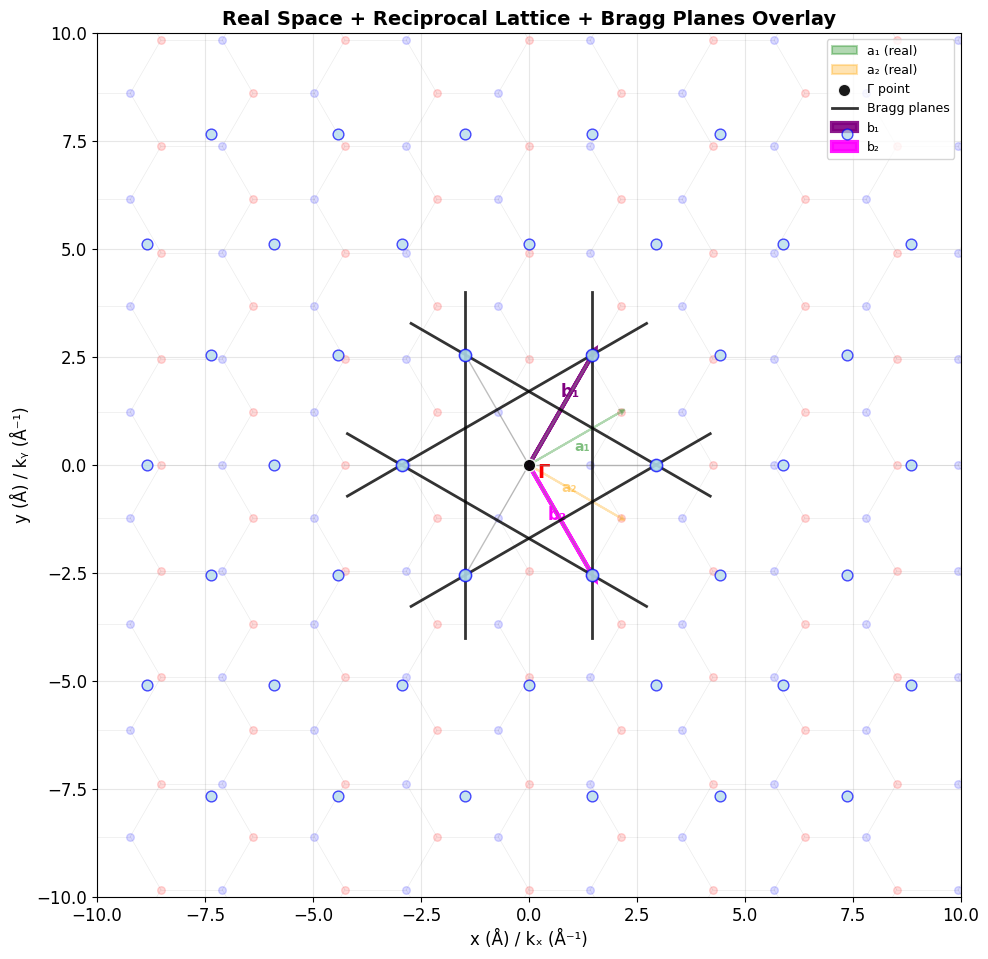

Bragg Planes Analysis with Real Space Overlay:
The Bragg condition: k·G = |G|²/2
Each reciprocal lattice vector G defines a Bragg plane.
Real space lattice shown as transparent background.

Nearest neighbor Bragg planes (First shell):
Index (i,j)  |  G⃗ vector  |  Distance  |  Midpoint
-------------------------------------------------------

Shell 1 (distance = 2.949 Å⁻¹):
  (-1, -1)     |  (-2.949,  0.000)  |   2.949  |  (-1.475,  0.000)
  (-1, 0)     |  (-1.475, -2.554)  |   2.949  |  (-0.737, -1.277)
  (0, -1)     |  (-1.475,  2.554)  |   2.949  |  (-0.737,  1.277)
  (0, 1)     |  ( 1.475, -2.554)  |   2.949  |  ( 0.737, -1.277)
  (1, 0)     |  ( 1.475,  2.554)  |   2.949  |  ( 0.737,  1.277)
  (1, 1)     |  ( 2.949,  0.000)  |   2.949  |  ( 1.475,  0.000)

Shell 2 (distance = 5.108 Å⁻¹):
  (-1, 1)     |  ( 0.000, -5.108)  |   5.108  |  ( 0.000, -2.554)
  (1, -1)     |  ( 0.000,  5.108)  |   5.108  |  ( 0.000,  2.554)

Overlay Configuration:
• Real space lattice: Transparent backgro

In [8]:
def construct_bragg_planes(max_order=1):
    """
    Construct Bragg planes for given order
    Returns reciprocal lattice points and their corresponding Bragg plane information
    """
    reciprocal_points = []
    
    # Generate reciprocal lattice vectors G = i*b1 + j*b2
    for i in range(-max_order, max_order+1):
        for j in range(-max_order, max_order+1):
            if i == 0 and j == 0:
                continue  # Skip the origin
                
            G = i * b1 + j * b2  # Reciprocal lattice vector
            magnitude = np.linalg.norm(G)
            
            # Calculate properties for Bragg plane construction
            normal = G / magnitude  # Unit normal vector
            midpoint = G / 2        # Midpoint of line from origin to G
            
            reciprocal_points.append({
                'indices': (i, j),
                'vector': G,
                'magnitude': magnitude,
                'normal': normal,
                'midpoint': midpoint
            })
    
    # Sort by distance from origin
    reciprocal_points.sort(key=lambda x: x['magnitude'])
    
    # Group by distance to identify shells
    bragg_planes = {}
    for rp in reciprocal_points:
        dist = round(rp['magnitude'], 6)  # Round to avoid floating point issues
        if dist not in bragg_planes:
            bragg_planes[dist] = []
        bragg_planes[dist].append(rp)
    
    return reciprocal_points, bragg_planes

def plot_bragg_planes_overlay():
    """Plot real space lattice with Bragg planes and reciprocal lattice overlaid (following section 6&7 approach)"""
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # === Real space lattice (background, transparent) ===
    n_cells = 7
    delta1 = np.array([bond_length, 0])
    delta2 = np.array([-bond_length/2, bond_length*np.sqrt(3)/2])
    delta3 = np.array([-bond_length/2, -bond_length*np.sqrt(3)/2])
    
    # Plot real space lattice (very transparent background)
    atoms_A = []
    atoms_B = []
    
    for i in range(-n_cells, n_cells+1):
        for j in range(-n_cells, n_cells+1):
            R = i * a1 + j * a2
            atoms_A.append(R)
            atoms_B.append(R + delta1)
    
    # Plot atoms with very low opacity (background)
    for atom in atoms_A:
        ax.scatter(atom[0], atom[1], c='red', s=30, alpha=0.15)
    for atom in atoms_B:
        ax.scatter(atom[0], atom[1], c='blue', s=30, alpha=0.15)
    
    # Draw bonds with very low opacity
    for atom_A in atoms_A:
        for atom_B in atoms_B:
            distance = np.linalg.norm(atom_A - atom_B)
            if abs(distance - bond_length) < 0.1:
                ax.plot([atom_A[0], atom_B[0]], [atom_A[1], atom_B[1]], 'k-', alpha=0.08, linewidth=0.5)
    
    # Plot real space lattice vectors (transparent)
    real_origin = np.array([0, 0])
    ax.arrow(real_origin[0], real_origin[1], a1[0], a1[1], head_width=0.1, head_length=0.1, 
              fc='green', ec='green', linewidth=1.5, alpha=0.3, label='a₁ (real)')
    ax.arrow(real_origin[0], real_origin[1], a2[0], a2[1], head_width=0.1, head_length=0.1, 
              fc='orange', ec='orange', linewidth=1.5, alpha=0.3, label='a₂ (real)')
    
    # === Reciprocal lattice overlay ===
    reciprocal_origin = np.array([0, 0])  # Center reciprocal lattice at origin for Bragg planes
    
    # Generate reciprocal lattice points for visualization
    n_recip = 7
    all_recip_points = []
    for i in range(-n_recip, n_recip+1):
        for j in range(-n_recip, n_recip+1):
            G = i * b1 + j * b2
            all_recip_points.append(G)
    
    # Plot all reciprocal lattice points
    for point in all_recip_points:
        if np.linalg.norm(point) == 0:
            ax.scatter(point[0], point[1], c='black', s=80, alpha=0.9, 
                       edgecolors='white', linewidth=1, label='Γ point', zorder=10, marker='o')
        else:
            ax.scatter(point[0], point[1], c='lightblue', s=60, alpha=0.7, 
                       edgecolors='blue', linewidth=1, zorder=8)
    
    # === Bragg planes construction ===
    reciprocal_points, bragg_planes = construct_bragg_planes(max_order=1)
    
    # Plot lines from origin to nearest neighbors and Bragg planes
    bragg_plane_color = 'black'  # Single color for all Bragg planes
    bragg_plane_added_to_legend = False  # Track if we've added Bragg plane to legend
    
    for i, rp in enumerate(reciprocal_points[:6]):  # Show first 6 nearest neighbors
        G = rp['vector']
        
        # Draw line from origin to G (reciprocal lattice vector) - keep varied colors for G vectors
        line_color = 'gray'
        ax.plot([0, G[0]], [0, G[1]], color=line_color, linewidth=1, alpha=0.5, zorder=6)
        
        # Mark the reciprocal lattice point - keep varied colors
        ax.scatter(G[0], G[1], c='lightblue', s=80, alpha=0.7, 
                   edgecolors='blue', linewidth=1, zorder=8)
        
        # Draw the Bragg plane (perpendicular bisector) - uniform color and style
        normal = rp['normal']
        perp_direction = np.array([-normal[1], normal[0]])  # Perpendicular to normal
        midpoint = rp['midpoint']
        
        # Create line segment for Bragg plane
        line_length = 8.0  # Slightly longer for better visibility
        start_point = midpoint - line_length/2 * perp_direction
        end_point = midpoint + line_length/2 * perp_direction
        
        # Add label only for the first Bragg plane to avoid cluttering legend
        label = 'Bragg planes' if not bragg_plane_added_to_legend else ""
        ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 
                color=bragg_plane_color, linewidth=2, alpha=0.8, linestyle='-', zorder=7, 
                label=label)
        bragg_plane_added_to_legend = True
    
    # Plot reciprocal lattice vectors
    ax.arrow(reciprocal_origin[0], reciprocal_origin[1], b1[0], b1[1], head_width=0.15, head_length=0.15, 
             fc='purple', ec='purple', linewidth=3, alpha=0.9, label='b₁')
    ax.arrow(reciprocal_origin[0], reciprocal_origin[1], b2[0], b2[1], head_width=0.15, head_length=0.15, 
             fc='magenta', ec='magenta', linewidth=3, alpha=0.9, label='b₂')
    
    # Add vector labels
    ax.text(a1[0]/2, a1[1]/2 - 0.3, 'a₁', fontsize=10, fontweight='bold', color='green', alpha=0.5)
    ax.text(a2[0]/2 - 0.3, a2[1]/2, 'a₂', fontsize=10, fontweight='bold', color='orange', alpha=0.5)
    ax.text(b1[0]/2, b1[1]/2 + 0.3, 'b₁', fontsize=12, fontweight='bold', color='purple')
    ax.text(b2[0]/2 - 0.3, b2[1]/2, 'b₂', fontsize=12, fontweight='bold', color='magenta')
    ax.text(0.2, -0.3, 'Γ', fontsize=14, fontweight='bold', color='red')
    
    # Mark the origins
    ax.scatter(real_origin[0], real_origin[1], c='black', s=60, marker='o', alpha=0.4, zorder=5)
    
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_xlabel('x (Å) / kₓ (Å⁻¹)', fontsize=12)
    ax.set_ylabel('y (Å) / kᵧ (Å⁻¹)', fontsize=12)
    ax.set_title('Real Space + Reciprocal Lattice + Bragg Planes Overlay', fontsize=14, fontweight='bold')
    ax.legend(loc='upper right', fontsize=9)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax, reciprocal_points, bragg_planes

# Execute the Bragg planes construction with overlay
fig, ax, reciprocal_points, bragg_planes = plot_bragg_planes_overlay()

# Display information about Bragg planes
print("Bragg Planes Analysis with Real Space Overlay:")
print("="*60)
print("The Bragg condition: k·G = |G|²/2")
print("Each reciprocal lattice vector G defines a Bragg plane.")
print("Real space lattice shown as transparent background.")
print()
print("Nearest neighbor Bragg planes (First shell):")
print("Index (i,j)  |  G⃗ vector  |  Distance  |  Midpoint")
print("-" * 55)

# Group by shells
distances = sorted(list(set([rp['magnitude'] for rp in reciprocal_points])))
for shell_idx, distance in enumerate(distances[:2]):  # First 2 shells
    print(f"\nShell {shell_idx + 1} (distance = {distance:.3f} Å⁻¹):")
    shell_points = [rp for rp in reciprocal_points if abs(rp['magnitude'] - distance) < 0.01]
    
    for rp in shell_points:
        G = rp['vector']
        midpoint = rp['midpoint']
        print(f"  {rp['indices']}     |  ({G[0]:6.3f}, {G[1]:6.3f})  |  {rp['magnitude']:6.3f}  |  ({midpoint[0]:6.3f}, {midpoint[1]:6.3f})")

print(f"\nOverlay Configuration:")
print("• Real space lattice: Transparent background (gray atoms and bonds)")
print("• Reciprocal lattice: Centered at origin with colored points")
print("• Bragg planes: Colored dashed lines perpendicular to G vectors")
print("• First Brillouin zone emerges from intersection of nearest Bragg planes")
print()

print("Physical interpretation:")
print("• Each Bragg plane represents the condition for constructive interference")
print("• The first Brillouin zone is the region enclosed by the nearest Bragg planes")
print("• Points inside the first BZ are closer to Γ than to any other reciprocal lattice point")
print("• Higher-order zones are regions between successive Bragg plane shells")
print("• Real space provides context for the k-space construction")

## 9. Construct the First Brillouin Zone

The **First Brillouin Zone** is the region in reciprocal space that contains all k-points closer to the origin (Γ point) than to any other reciprocal lattice point. It is constructed by:

1. **Finding the perpendicular bisectors** (Bragg planes) of lines connecting the origin to all reciprocal lattice points
2. **Taking the intersection** of all half-spaces defined by the nearest Bragg planes
3. **The resulting convex polygon** is the first Brillouin zone

For graphene's hexagonal lattice, the first Brillouin zone is a **hexagon** in reciprocal space. The vertices of this hexagon are the **K and K' points**, which are crucial for graphene's electronic properties.

### Mathematical Construction:
- Each Bragg plane satisfies: **k⃗ · G⃗ = |G⃗|²/2**
- The first BZ contains all k⃗ such that: **|k⃗| < |k⃗ - G⃗|** for all G⃗ ≠ 0
- This creates the **Wigner-Seitz cell** of the reciprocal lattice

First shell distance: 2.949 Å⁻¹
Number of nearest neighbors: 6


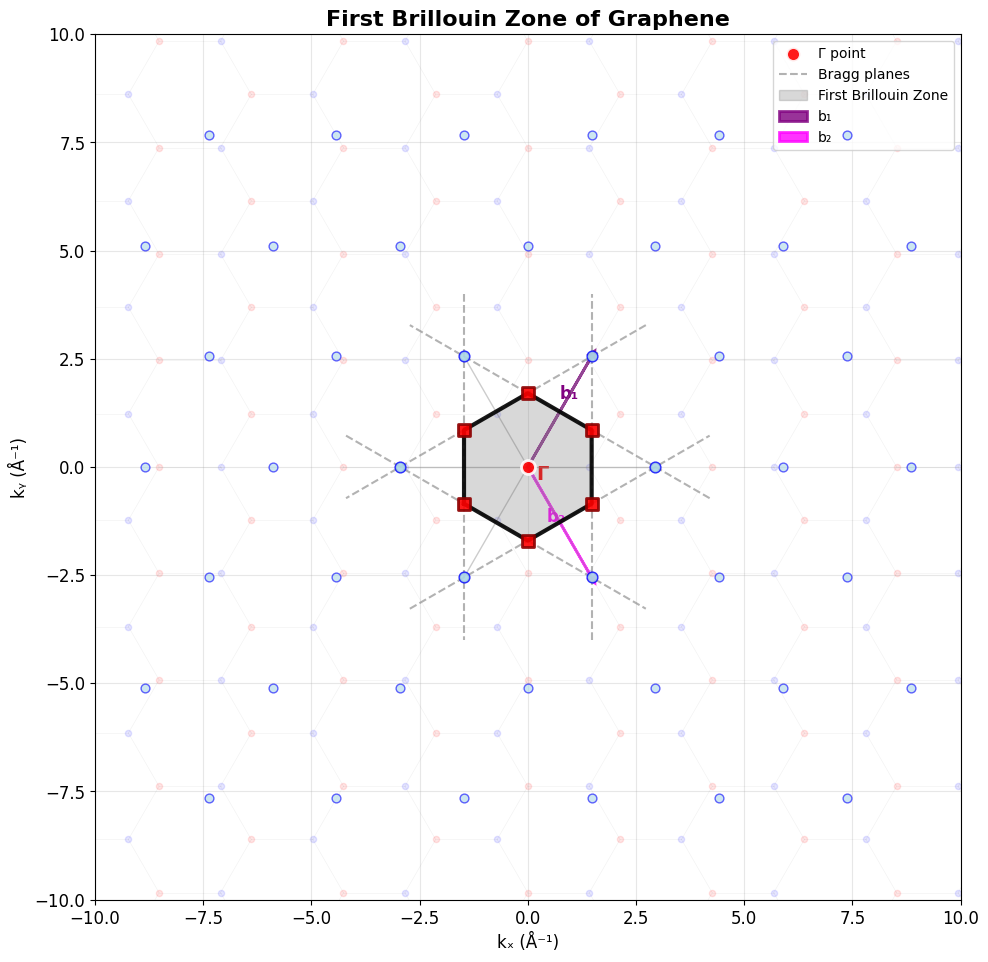


First Brillouin Zone Analysis:
Number of vertices: 6
BZ shape: Hexagon

Brillouin Zone Vertices (K-points):
Vertex  |  Coordinates (Å⁻¹)  |  Distance from Γ
-------------------------------------------------------
  1     |  (-1.475, -0.851)  |   1.703
  2     |  ( 0.000, -1.703)  |   1.703
  3     |  ( 1.475, -0.851)  |   1.703
  4     |  ( 1.475,  0.851)  |   1.703
  5     |  ( 0.000,  1.703)  |   1.703
  6     |  (-1.475,  0.851)  |   1.703

Brillouin Zone Properties:
• BZ Area: 7.532843 Å⁻²
• Reciprocal unit cell area: 7.532843 Å⁻²
• Area ratio: 1.000000 (should be 1.0)

Physical Significance:
• The hexagonal first BZ reflects graphene's hexagonal symmetry
• Vertices are the famous K and K' points where Dirac cones occur
• Electronic states repeat with BZ periodicity
• The BZ area equals the reciprocal unit cell area (Wigner-Seitz cell)
• This is the fundamental domain for electronic band structure


C:\Users\xuli\AppData\Local\Temp\ipykernel_23540\3376041639.py:242: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  reciprocal_unit_cell_area = abs(np.cross(b1, b2))


In [ ]:
def construct_brillouin_zone():
    """
    Construct the first Brillouin zone by finding the intersection of half-spaces
    defined by the nearest Bragg planes
    """
    # Get the reciprocal lattice points and Bragg planes from section 8
    reciprocal_points, bragg_planes = construct_bragg_planes(max_order=1)
    
    # Get the nearest neighbors (first shell)
    distances = sorted(list(set([rp['magnitude'] for rp in reciprocal_points])))
    first_shell_distance = distances[0]
    first_shell_points = [rp for rp in reciprocal_points if abs(rp['magnitude'] - first_shell_distance) < 0.01]
    
    print(f"First shell distance: {first_shell_distance:.3f} Å⁻¹")
    print(f"Number of nearest neighbors: {len(first_shell_points)}")
    
    # For each nearest neighbor, find where its Bragg plane intersects with others
    # The Brillouin zone vertices are at the intersections of Bragg planes
    
    def line_intersection(p1, d1, p2, d2):
        """Find intersection of two lines defined by point and direction"""
        # Line 1: p1 + t1 * d1
        # Line 2: p2 + t2 * d2
        # Solve: p1 + t1*d1 = p2 + t2*d2
        
        # Convert to matrix form: [d1, -d2] * [t1; t2] = p2 - p1
        A = np.column_stack([d1, -d2])
        b = p2 - p1
        
        try:
            t = np.linalg.solve(A, b)
            intersection = p1 + t[0] * d1
            return intersection
        except np.linalg.LinAlgError:
            return None  # Lines are parallel
    
    # Find BZ vertices by intersecting adjacent Bragg planes
    bz_vertices = []
    
    for i, rp1 in enumerate(first_shell_points):
        for j, rp2 in enumerate(first_shell_points):
            if i >= j:  # Avoid duplicate pairs
                continue
                
            # Get Bragg plane properties
            midpoint1 = rp1['midpoint']
            normal1 = rp1['normal']
            direction1 = np.array([-normal1[1], normal1[0]])  # Perpendicular to normal
            
            midpoint2 = rp2['midpoint']
            normal2 = rp2['normal']
            direction2 = np.array([-normal2[1], normal2[0]])  # Perpendicular to normal
            
            # Find intersection of the two Bragg planes
            intersection = line_intersection(midpoint1, direction1, midpoint2, direction2)
            
            if intersection is not None:
                # Check if this intersection is actually a BZ vertex
                # (i.e., it's closer to origin than to any other reciprocal lattice point)
                distance_to_origin = np.linalg.norm(intersection)
                
                is_bz_vertex = True
                for rp in first_shell_points:
                    G = rp['vector']
                    distance_to_G = np.linalg.norm(intersection - G)
                    if distance_to_G < distance_to_origin - 1e-10:  # Small tolerance
                        is_bz_vertex = False
                        break
                
                if is_bz_vertex:
                    bz_vertices.append(intersection)
    
    # Remove duplicate vertices (approximately)
    unique_vertices = []
    for vertex in bz_vertices:
        is_duplicate = False
        for unique_vertex in unique_vertices:
            if np.linalg.norm(vertex - unique_vertex) < 1e-6:
                is_duplicate = True
                break
        if not is_duplicate:
            unique_vertices.append(vertex)
    
    bz_vertices = unique_vertices
    
    # Sort vertices by angle to create proper polygon
    if len(bz_vertices) > 0:
        angles = [np.arctan2(v[1], v[0]) for v in bz_vertices]
        sorted_indices = np.argsort(angles)
        bz_vertices = [bz_vertices[i] for i in sorted_indices]
    
    return bz_vertices, first_shell_points

def plot_brillouin_zone():
    """Plot the complete construction with Brillouin zone highlighted"""
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # === Real space lattice (very transparent background) ===
    n_cells = 7
    delta1 = np.array([bond_length, 0])
    
    # Plot real space lattice (very transparent)
    atoms_A = []
    atoms_B = []
    
    for i in range(-n_cells, n_cells+1):
        for j in range(-n_cells, n_cells+1):
            R = i * a1 + j * a2
            atoms_A.append(R)
            atoms_B.append(R + delta1)
    
    # Plot atoms with very low opacity
    for atom in atoms_A:
        ax.scatter(atom[0], atom[1], c='red', s=20, alpha=0.1)
    for atom in atoms_B:
        ax.scatter(atom[0], atom[1], c='blue', s=20, alpha=0.1)
    
    # Draw bonds with very low opacity
    for atom_A in atoms_A:
        for atom_B in atoms_B:
            distance = np.linalg.norm(atom_A - atom_B)
            if abs(distance - bond_length) < 0.1:
                ax.plot([atom_A[0], atom_B[0]], [atom_A[1], atom_B[1]], 'k-', alpha=0.05, linewidth=0.5)
    
    # === Reciprocal lattice overlay ===
    n_recip = 7
    all_recip_points = []
    for i in range(-n_recip, n_recip+1):
        for j in range(-n_recip, n_recip+1):
            G = i * b1 + j * b2
            all_recip_points.append(G)
    
    # Plot reciprocal lattice points
    for point in all_recip_points:
        if np.linalg.norm(point) == 0:
            ax.scatter(point[0], point[1], c='red', s=100, alpha=0.9, 
                       edgecolors='white', linewidth=2, label='Γ point', zorder=10, marker='o')
        else:
            ax.scatter(point[0], point[1], c='lightblue', s=40, alpha=0.6, 
                       edgecolors='blue', linewidth=1, zorder=8)
    
    # === Construct and plot Brillouin zone ===
    bz_vertices, first_shell_points = construct_brillouin_zone()
    
    # Plot Bragg planes from first shell
    for i, rp in enumerate(first_shell_points):
        G = rp['vector']
        
        # Draw line from origin to G
        ax.plot([0, G[0]], [0, G[1]], color='gray', linewidth=1, alpha=0.4, zorder=6)
        
        # Mark the reciprocal lattice point
        ax.scatter(G[0], G[1], c='lightblue', s=60, alpha=0.8, 
                   edgecolors='blue', linewidth=1, zorder=8)
        
        # Draw the Bragg plane
        normal = rp['normal']
        perp_direction = np.array([-normal[1], normal[0]])
        midpoint = rp['midpoint']
        
        line_length = 8.0
        start_point = midpoint - line_length/2 * perp_direction
        end_point = midpoint + line_length/2 * perp_direction
        
        label = 'Bragg planes' if i == 0 else ""
        ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 
                color='gray', linewidth=1.5, alpha=0.6, linestyle='--', zorder=7, label=label)
    
    # === Plot the Brillouin zone ===
    if len(bz_vertices) > 0:
        # Close the polygon by adding the first vertex at the end
        bz_polygon = bz_vertices + [bz_vertices[0]]
        bz_x = [v[0] for v in bz_polygon]
        bz_y = [v[1] for v in bz_polygon]
        
        # Fill the Brillouin zone
        ax.fill(bz_x, bz_y, color='grey', alpha=0.3, label='First Brillouin Zone', zorder=9)
        
        # Draw the boundary
        ax.plot(bz_x, bz_y, color='black', linewidth=3, alpha=0.9, zorder=10)
        
        # Mark the vertices
        for vertex in bz_vertices:
            ax.scatter(vertex[0], vertex[1], c='red', s=80, alpha=0.9, 
                       edgecolors='darkred', linewidth=2, zorder=11, marker='s')
    
    # Plot reciprocal lattice vectors
    ax.arrow(0, 0, b1[0], b1[1], head_width=0.15, head_length=0.15, 
             fc='purple', ec='purple', linewidth=2, alpha=0.8, label='b₁')
    ax.arrow(0, 0, b2[0], b2[1], head_width=0.15, head_length=0.15, 
             fc='magenta', ec='magenta', linewidth=2, alpha=0.8, label='b₂')
    
    # Add labels
    ax.text(b1[0]/2, b1[1]/2 + 0.3, 'b₁', fontsize=12, fontweight='bold', color='purple')
    ax.text(b2[0]/2 - 0.3, b2[1]/2, 'b₂', fontsize=12, fontweight='bold', color='magenta')
    ax.text(0.2, -0.3, 'Γ', fontsize=14, fontweight='bold', color='red')
    
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_xlabel('kₓ (Å⁻¹)', fontsize=12)
    ax.set_ylabel('kᵧ (Å⁻¹)', fontsize=12)
    ax.set_title('First Brillouin Zone of Graphene', fontsize=16, fontweight='bold')
    ax.legend(loc='upper right', fontsize=10)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax, bz_vertices

# Execute the Brillouin zone construction
fig, ax, bz_vertices = plot_brillouin_zone()

# Display Brillouin zone properties
print("\nFirst Brillouin Zone Analysis:")
print("="*50)
print(f"Number of vertices: {len(bz_vertices)}")
print(f"BZ shape: {'Hexagon' if len(bz_vertices) == 6 else 'Polygon'}")
print()

if len(bz_vertices) > 0:
    print("Brillouin Zone Vertices (K-points):")
    print("Vertex  |  Coordinates (Å⁻¹)  |  Distance from Γ")
    print("-" * 55)
    
    for i, vertex in enumerate(bz_vertices):
        distance = np.linalg.norm(vertex)
        print(f"  {i+1}     |  ({vertex[0]:6.3f}, {vertex[1]:6.3f})  |  {distance:6.3f}")
    
    # Calculate BZ area
    def polygon_area(vertices):
        n = len(vertices)
        area = 0.0
        for i in range(n):
            j = (i + 1) % n
            area += vertices[i][0] * vertices[j][1]
            area -= vertices[j][0] * vertices[i][1]
        return abs(area) / 2.0
    
    bz_area = polygon_area(bz_vertices)
    reciprocal_unit_cell_area = abs(b1[0] * b2[1] - b1[1] * b2[0])  # 2D cross product: |b1 × b2|
    
    print(f"\nBrillouin Zone Properties:")
    print(f"• BZ Area: {bz_area:.6f} Å⁻²")
    print(f"• Reciprocal unit cell area: {reciprocal_unit_cell_area:.6f} Å⁻²")
    print(f"• Area ratio: {bz_area/reciprocal_unit_cell_area:.6f} (should be 1.0)")
    
    print(f"\nPhysical Significance:")
    print("• The hexagonal first BZ reflects graphene's hexagonal symmetry")
    print("• Vertices are the famous K and K' points where Dirac cones occur")
    print("• Electronic states repeat with BZ periodicity")
    print("• The BZ area equals the reciprocal unit cell area (Wigner-Seitz cell)")
    print("• This is the fundamental domain for electronic band structure")
else:
    print("Warning: Could not construct Brillouin zone vertices!")

## 10. High-Symmetry Points in the Brillouin Zone

The Brillouin zone contains several **high-symmetry points** that are crucial for understanding graphene's electronic properties:

1. **Γ (Gamma) Point**: The center of the BZ at k = (0, 0)
2. **K and K' Points**: The vertices of the hexagonal BZ where Dirac cones occur
3. **M Points**: The midpoints of the hexagon edges

These points are essential for:
- **Band structure calculations**: Electronic bands are typically calculated along high-symmetry paths
- **Dirac cones**: K and K' points host the linear dispersion that gives graphene its unique properties
- **Symmetry analysis**: The points reflect the hexagonal crystal symmetry

### Physical Significance:
- **K and K' points**: Valleys in the band structure where conduction and valence bands touch
- **M points**: Usually local extrema in the band structure
- **Γ point**: Often the reference point for band structure plots

First shell distance: 2.949 Å⁻¹
Number of nearest neighbors: 6


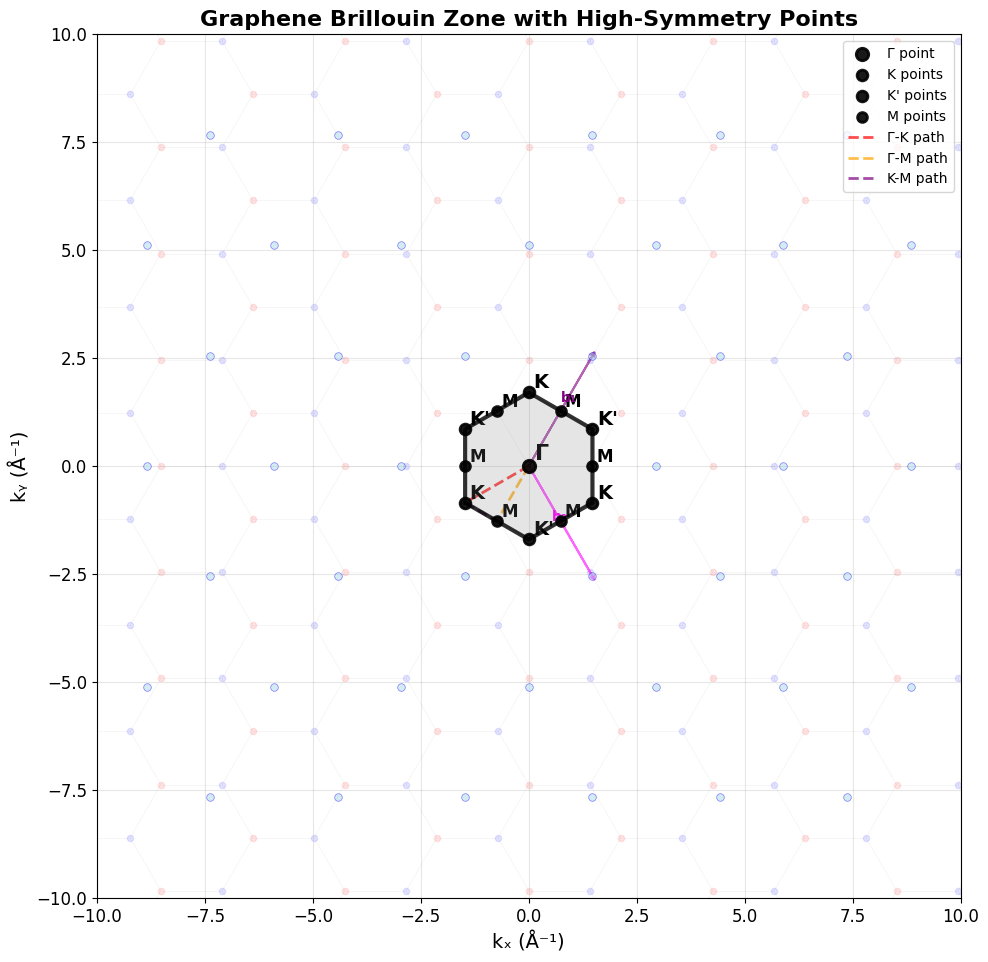

High-Symmetry Points in Graphene's Brillouin Zone:

Γ (Gamma) Point - Center of BZ:
  Coordinates: (0.000, 0.000) Å⁻¹
  Physical significance: Band structure reference point

K Points - Dirac Points (3 equivalent points):
  K1: (-1.475, -0.851) Å⁻¹, |K| = 1.703
  K2: ( 1.475, -0.851) Å⁻¹, |K| = 1.703
  K3: ( 0.000,  1.703) Å⁻¹, |K| = 1.703
  Physical significance: Dirac cone locations, linear dispersion

K' Points - Dirac Points (3 equivalent points):
  K'1: ( 0.000, -1.703) Å⁻¹, |K'| = 1.703
  K'2: ( 1.475,  0.851) Å⁻¹, |K'| = 1.703
  K'3: (-1.475,  0.851) Å⁻¹, |K'| = 1.703
  Physical significance: Inequivalent Dirac cone locations

M Points - Edge Midpoints (6 equivalent points):
  M1: (-0.737, -1.277) Å⁻¹, |M| = 1.475
  M2: ( 0.737, -1.277) Å⁻¹, |M| = 1.475
  M3: ( 1.475,  0.000) Å⁻¹, |M| = 1.475
  M4: ( 0.737,  1.277) Å⁻¹, |M| = 1.475
  M5: (-0.737,  1.277) Å⁻¹, |M| = 1.475
  M6: (-1.475,  0.000) Å⁻¹, |M| = 1.475
  Physical significance: Often local band extrema

High-Symmetry Path

In [10]:
def identify_high_symmetry_points(bz_vertices):
    """
    Identify the high-symmetry points in the Brillouin zone
    """
    # Γ point (center of BZ)
    gamma_point = np.array([0.0, 0.0])
    
    # K and K' points (vertices of the hexagon)
    # For graphene, there are 6 vertices, but only 2 unique types (K and K')
    K_points = []
    K_prime_points = []
    
    # Group vertices: In graphene's BZ, alternate vertices are K and K' points
    # We can distinguish them by their position relative to reciprocal lattice vectors
    for i, vertex in enumerate(bz_vertices):
        if i % 2 == 0:  # Even indices are K points
            K_points.append(vertex)
        else:  # Odd indices are K' points  
            K_prime_points.append(vertex)
    
    # For demonstration, take representative K and K' points
    K = K_points[0] if K_points else None
    K_prime = K_prime_points[0] if K_prime_points else None
    
    # M points (midpoints of hexagon edges)
    M_points = []
    if len(bz_vertices) >= 3:
        for i in range(len(bz_vertices)):
            next_i = (i + 1) % len(bz_vertices)
            midpoint = (bz_vertices[i] + bz_vertices[next_i]) / 2
            M_points.append(midpoint)
    
    # Take a representative M point
    M = M_points[0] if M_points else None
    
    return gamma_point, K, K_prime, M, K_points, K_prime_points, M_points

def plot_high_symmetry_points():
    """Plot the Brillouin zone with high-symmetry points labeled"""
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    # Get the BZ vertices from previous construction
    bz_vertices, first_shell_points = construct_brillouin_zone()
    
    # === Real space lattice (very transparent background) ===
    n_cells = 7
    delta1 = np.array([bond_length, 0])
    
    # Plot real space lattice (very transparent)
    atoms_A = []
    atoms_B = []
    
    for i in range(-n_cells, n_cells+1):
        for j in range(-n_cells, n_cells+1):
            R = i * a1 + j * a2
            atoms_A.append(R)
            atoms_B.append(R + delta1)
    
    # Plot atoms with very low opacity
    for atom in atoms_A:
        ax.scatter(atom[0], atom[1], c='red', s=20, alpha=0.1)
    for atom in atoms_B:
        ax.scatter(atom[0], atom[1], c='blue', s=20, alpha=0.1)
    
    # Draw bonds with very low opacity
    for atom_A in atoms_A:
        for atom_B in atoms_B:
            distance = np.linalg.norm(atom_A - atom_B)
            if abs(distance - bond_length) < 0.1:
                ax.plot([atom_A[0], atom_B[0]], [atom_A[1], atom_B[1]], 'k-', alpha=0.05, linewidth=0.5)
    
    # === Plot reciprocal lattice (simplified) ===
    n_recip = 5
    for i in range(-n_recip, n_recip+1):
        for j in range(-n_recip, n_recip+1):
            G = i * b1 + j * b2
            if np.linalg.norm(G) == 0:
                continue  # Skip origin, will plot separately
            ax.scatter(G[0], G[1], c='lightblue', s=30, alpha=0.5, 
                       edgecolors='blue', linewidth=0.5, zorder=5)
    
    # === Plot the Brillouin zone ===
    if len(bz_vertices) > 0:
        # Close the polygon
        bz_polygon = bz_vertices + [bz_vertices[0]]
        bz_x = [v[0] for v in bz_polygon]
        bz_y = [v[1] for v in bz_polygon]
        
        # Fill and outline the BZ
        ax.fill(bz_x, bz_y, color='grey', alpha=0.2, zorder=8)
        ax.plot(bz_x, bz_y, color='black', linewidth=3, alpha=0.8, zorder=9)
    
    # === Identify and plot high-symmetry points ===
    gamma_point, K, K_prime, M, K_points, K_prime_points, M_points = identify_high_symmetry_points(bz_vertices)
    
    # Plot Γ point
    ax.scatter(gamma_point[0], gamma_point[1], c='black', s=80, alpha=0.9, 
               edgecolors='black', linewidth=2, zorder=12, marker='o', label='Γ point')
    ax.text(gamma_point[0] + 0.15, gamma_point[1] + 0.15, 'Γ', fontsize=16, 
            fontweight='bold', color='black')
    
    # Plot K points
    for i, k_point in enumerate(K_points):
        ax.scatter(k_point[0], k_point[1], c='black', s=60, alpha=0.9, 
                   edgecolors='black', linewidth=2, zorder=11, marker='o',
                   label='K points' if i == 0 else "")
        ax.text(k_point[0] + 0.1, k_point[1] + 0.1, f'K', fontsize=14, 
                fontweight='bold', color='black')
    
    # Plot K' points
    for i, k_prime_point in enumerate(K_prime_points):
        ax.scatter(k_prime_point[0], k_prime_point[1], c='black', s=60, alpha=0.9, 
                   edgecolors='black', linewidth=2, zorder=11, marker='o',
                   label="K' points" if i == 0 else "")
        ax.text(k_prime_point[0] + 0.1, k_prime_point[1] + 0.1, "K'", fontsize=14, 
                fontweight='bold', color='black')
    
    # Plot M points
    for i, m_point in enumerate(M_points):
        ax.scatter(m_point[0], m_point[1], c='black', s=50, alpha=0.9, 
                   edgecolors='black', linewidth=2, zorder=10, marker='o',
                   label='M points' if i == 0 else "")
        ax.text(m_point[0] + 0.1, m_point[1] + 0.1, 'M', fontsize=12, 
                fontweight='bold', color='black')
    
    # === Plot high-symmetry paths ===
    # Γ-K path
    if K is not None:
        ax.plot([gamma_point[0], K[0]], [gamma_point[1], K[1]], 
                'r--', linewidth=2, alpha=0.7, label='Γ-K path')
    
    # Γ-M path
    if M is not None:
        ax.plot([gamma_point[0], M_points[0][0]], [gamma_point[1], M_points[0][1]], 
                'orange', linestyle='--', linewidth=2, alpha=0.7, label='Γ-M path')
    
    # K-M path (first K to first M)
    if K is not None and M is not None:
        ax.plot([K[0], M_points[0][0]], [K[1], M_points[0][1]], 
                'purple', linestyle='--', linewidth=2, alpha=0.7, label='K-M path')
    
    # Plot reciprocal lattice vectors
    ax.arrow(0, 0, b1[0], b1[1], head_width=0.1, head_length=0.1, 
             fc='purple', ec='purple', linewidth=1.5, alpha=0.6)
    ax.arrow(0, 0, b2[0], b2[1], head_width=0.1, head_length=0.1, 
             fc='magenta', ec='magenta', linewidth=1.5, alpha=0.6)
    
    # Add reciprocal vector labels
    ax.text(b1[0]/2, b1[1]/2 + 0.2, 'b₁', fontsize=10, fontweight='bold', color='purple')
    ax.text(b2[0]/2 - 0.2, b2[1]/2, 'b₂', fontsize=10, fontweight='bold', color='magenta')
    
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_xlabel('kₓ (Å⁻¹)', fontsize=14)
    ax.set_ylabel('kᵧ (Å⁻¹)', fontsize=14)
    ax.set_title('Graphene Brillouin Zone with High-Symmetry Points', fontsize=16, fontweight='bold')
    ax.legend(loc='upper right', fontsize=10)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax, gamma_point, K, K_prime, M, K_points, K_prime_points, M_points

# Execute the high-symmetry points visualization
fig, ax, gamma_point, K, K_prime, M, K_points, K_prime_points, M_points = plot_high_symmetry_points()

# Display high-symmetry points information
print("High-Symmetry Points in Graphene's Brillouin Zone:")
print("="*60)

print(f"\nΓ (Gamma) Point - Center of BZ:")
print(f"  Coordinates: ({gamma_point[0]:.3f}, {gamma_point[1]:.3f}) Å⁻¹")
print(f"  Physical significance: Band structure reference point")

if K is not None:
    print(f"\nK Points - Dirac Points (3 equivalent points):")
    for i, k_point in enumerate(K_points):
        distance = np.linalg.norm(k_point)
        print(f"  K{i+1}: ({k_point[0]:6.3f}, {k_point[1]:6.3f}) Å⁻¹, |K| = {distance:.3f}")
    print(f"  Physical significance: Dirac cone locations, linear dispersion")

if K_prime is not None:
    print(f"\nK' Points - Dirac Points (3 equivalent points):")
    for i, k_prime_point in enumerate(K_prime_points):
        distance = np.linalg.norm(k_prime_point)
        print(f"  K'{i+1}: ({k_prime_point[0]:6.3f}, {k_prime_point[1]:6.3f}) Å⁻¹, |K'| = {distance:.3f}")
    print(f"  Physical significance: Inequivalent Dirac cone locations")

if M is not None:
    print(f"\nM Points - Edge Midpoints (6 equivalent points):")
    for i, m_point in enumerate(M_points):
        distance = np.linalg.norm(m_point)
        print(f"  M{i+1}: ({m_point[0]:6.3f}, {m_point[1]:6.3f}) Å⁻¹, |M| = {distance:.3f}")
    print(f"  Physical significance: Often local band extrema")

print(f"\nHigh-Symmetry Paths for Band Structure:")
print("• Γ-K: From center to Dirac point")
print("• Γ-M: From center to edge midpoint") 
print("• K-M: Between Dirac point and edge midpoint")
print("• These paths capture the essential band structure features")

print(f"\nKey Properties:")
if K is not None and K_prime is not None:
    K_K_prime_distance = np.linalg.norm(np.array(K) - np.array(K_prime))
    print(f"• Distance between K and K': {K_K_prime_distance:.3f} Å⁻¹")
if K is not None:
    gamma_K_distance = np.linalg.norm(K)
    print(f"• Distance from Γ to K: {gamma_K_distance:.3f} Å⁻¹")
if M is not None:
    gamma_M_distance = np.linalg.norm(M_points[0])
    print(f"• Distance from Γ to M: {gamma_M_distance:.3f} Å⁻¹")

print(f"\n• Total BZ vertices: {len(bz_vertices)} (hexagonal)")
print(f"• K points: {len(K_points)} (valleys in band structure)")
print(f"• K' points: {len(K_prime_points)} (inequivalent valleys)")
print(f"• M points: {len(M_points)} (edge centers)")
print("• The 6-fold rotational symmetry is clearly visible")

## 11. Customizable Brillouin Zone Visualization

This section provides a **fully customizable version** of the Brillouin zone visualization. You can easily adjust:

### **Tunable Parameters:**
- **Number of Brillouin Zones**: Display the first BZ only or add up to 6 surrounding zones
- **Layer Transparencies**: Control visibility of each layer independently
- **Colors**: Customize colors for all elements, including different colors for each BZ
- **Marker Sizes**: Adjust sizes of high-symmetry points
- **Line Widths**: Control thickness of boundaries and paths
- **Figure Size**: Modify the overall plot dimensions

### **Layer Structure:**
1. **Real Space Lattice** (background)
2. **Reciprocal Lattice Points** 
3. **Multiple Brillouin Zones** (filling and boundary)
4. **High-Symmetry Points** (Γ, K, K', M)
5. **High-Symmetry Paths**
6. **Vector Labels and Annotations**

### **Multiple Brillouin Zones:**
- Set `bz_zones_to_show = 1` for the first BZ only
- Set `bz_zones_to_show = 7` to display the first BZ plus 6 surrounding zones
- Each zone can have different colors, transparency, and boundary properties
- The surrounding zones are generated by translating the first BZ by reciprocal lattice vectors

Simply modify the parameters at the beginning of the next cell to customize the visualization to your preferences!

First shell distance: 2.949 Å⁻¹
Number of nearest neighbors: 6


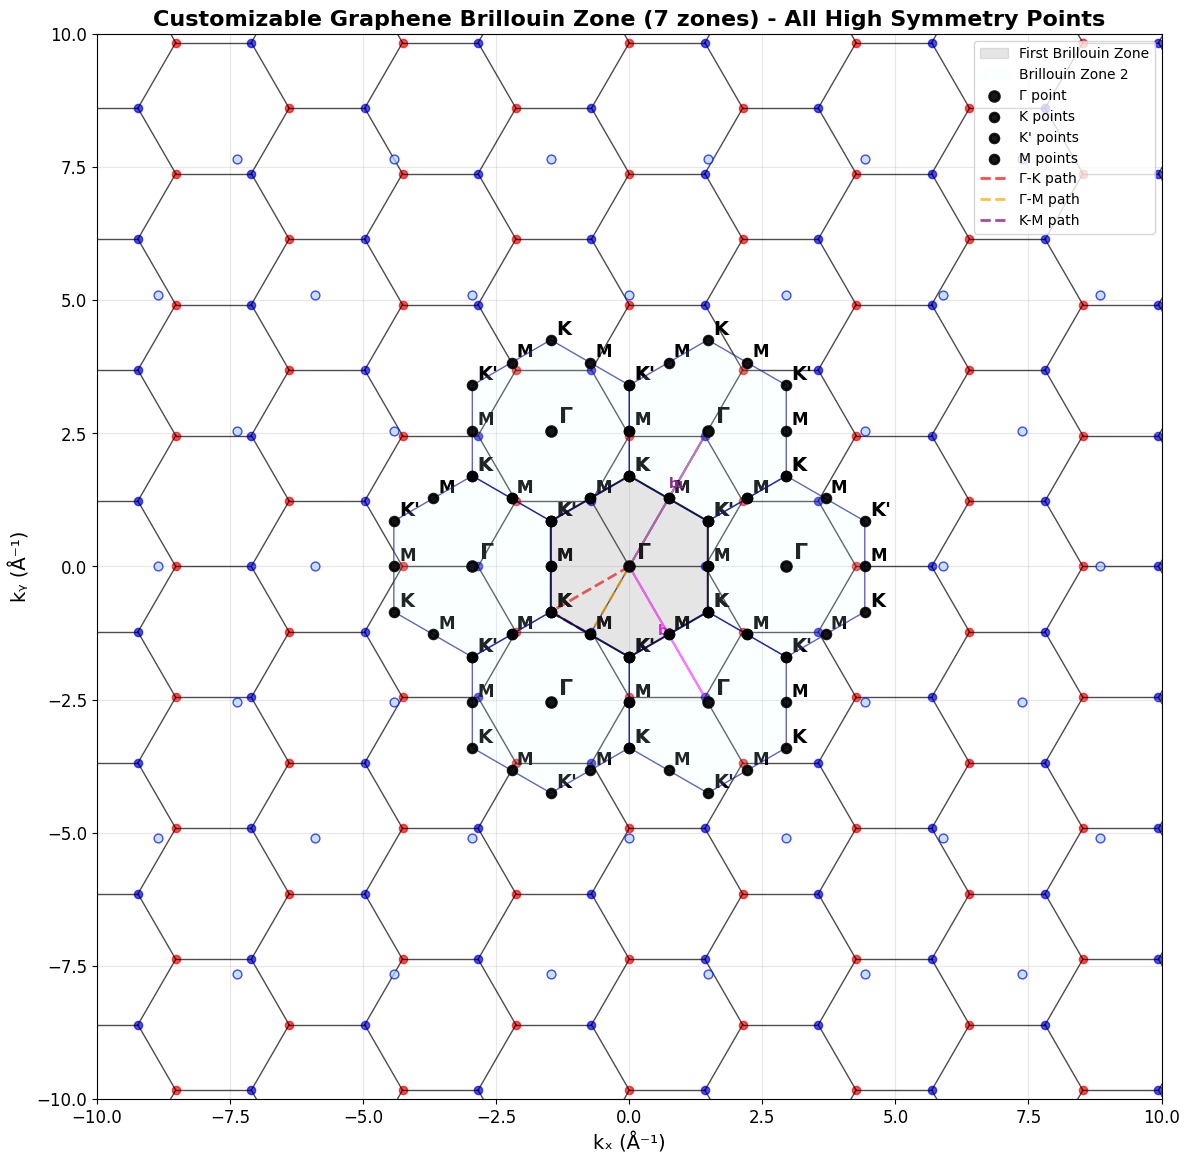

Customizable Brillouin Zone Visualization Complete!
To modify the visualization, simply change the parameters
at the beginning of this cell and re-run it.

Key parameters you can adjust:
• bz_zones_to_show: Number of Brillouin zones to display
• mark_all_zones_points: Mark high symmetry points in all zones
• Layer transparencies (alpha values)
• Colors for all elements
• Marker sizes and line widths
• Enable/disable any layer
• Figure size and coordinate range
• Text sizes and styles

Currently showing 7 Brillouin zones:
  Zone 1: First Brillouin Zone (centered at origin)
  Zone 2: Translated by (1.475, 2.554) Å⁻¹
  Zone 3: Translated by (1.475, -2.554) Å⁻¹
  Zone 4: Translated by (2.949, 0.000) Å⁻¹
  Zone 5: Translated by (-1.475, -2.554) Å⁻¹
  Zone 6: Translated by (-1.475, 2.554) Å⁻¹
  Zone 7: Translated by (-2.949, 0.000) Å⁻¹

High symmetry points marked in all zones:
  • Γ points: 7
  • K points: 21
  • K' points: 21
  • M points: 42
  • Total: 91 high symmetry points


In [11]:
# ===========================
# CUSTOMIZABLE PARAMETERS
# ===========================

# Figure settings
figure_size = (12, 12)  # (width, height) in inches
coordinate_range = (-10, 10)  # axis limits (-range, +range)

# Real space lattice (background layer)
real_space_enabled = True
real_space_atom_size = 35
real_space_atom_alpha = 0.7  # transparency (0=invisible, 1=opaque)
real_space_bond_alpha = 0.7
real_space_bond_width = 1
real_space_atom_A_color = 'red'
real_space_atom_B_color = 'blue'
real_space_bond_color = 'black'

# Reciprocal lattice points
reciprocal_lattice_enabled = True
reciprocal_lattice_size = 40
reciprocal_lattice_alpha = 0.7
reciprocal_lattice_color = 'lightblue'
reciprocal_lattice_edge_color = 'blue'
reciprocal_lattice_edge_width = 1

# Brillouin zones
bz_zones_to_show = 7  # Number of Brillouin zones to display (1 = first BZ only, 7 = first + 6 surrounding)
bz_fill_enabled = True
bz_fill_colors = ['grey', 'lightcyan', 'lightcyan', 'lightcyan', 'lightcyan', 'lightcyan', 'lightcyan']  # Colors for each zone
bz_fill_alphas = [0.2, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15]  # Alpha values for each zone
bz_boundary_enabled = True
bz_boundary_colors = ['black', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue']  # Boundary colors
bz_boundary_widths = [1.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]  # Boundary widths
bz_boundary_alphas = [0.8, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]  # Boundary alpha values

# High-symmetry points
# Gamma point
gamma_enabled = True
gamma_size = 50
gamma_color = 'black'
gamma_alpha = 0.9
gamma_edge_color = 'black'
gamma_edge_width = 2
gamma_text_size = 16
gamma_text_color = 'black'

# K points
k_enabled = True
k_size = 40
k_color = 'black'
k_alpha = 0.9
k_edge_color = 'black'
k_edge_width = 2
k_text_size = 14
k_text_color = 'black'

# K' points
k_prime_enabled = True
k_prime_size = 40
k_prime_color = 'black'
k_prime_alpha = 0.9
k_prime_edge_color = 'black'
k_prime_edge_width = 2
k_prime_text_size = 14
k_prime_text_color = 'black'

# M points
m_enabled = True
m_size = 40
m_color = 'black'
m_alpha = 0.9
m_edge_color = 'black'
m_edge_width = 2
m_text_size = 12
m_text_color = 'black'

# High-symmetry points for multiple zones
mark_all_zones_points = True  # If True, mark high symmetry points in all zones; if False, only in first zone

# High-symmetry paths
paths_enabled = True
gamma_k_path_color = 'red'
gamma_m_path_color = 'orange'
k_m_path_color = 'purple'
path_width = 2
path_alpha = 0.7
path_style = '--'  # '--' for dashed, '-' for solid

# Reciprocal lattice vectors
vectors_enabled = True
b1_color = 'purple'
b2_color = 'magenta'
vector_width = 1.5
vector_alpha = 0.6
vector_head_width = 0.1
vector_head_length = 0.1
vector_text_size = 10
vector_text_alpha = 1.0

# Grid and labels
grid_enabled = True
grid_alpha = 0.3
title_size = 16
axis_label_size = 14
legend_size = 10
legend_location = 'upper right'

# ===========================
# PLOTTING FUNCTION
# ===========================

def generate_multiple_brillouin_zones(bz_vertices, num_zones=7):
    """
    Generate multiple Brillouin zones by translating the first BZ by reciprocal lattice vectors
    
    Args:
        bz_vertices: vertices of the first Brillouin zone
        num_zones: number of zones to generate (1 = first only, 7 = first + 6 surrounding)
    
    Returns:
        List of BZ zones, each containing vertices and translation vector
    """
    zones = []
    
    # First zone (original, no translation)
    zones.append({
        'vertices': bz_vertices,
        'translation': np.array([0, 0]),
        'zone_index': 0
    })
    
    if num_zones > 1:
        # Generate the 6 surrounding zones by translating with nearest neighbor G vectors
        # The translations that create adjacent BZs are the nearest reciprocal lattice vectors
        translations = [
            b1,                    # Right
            b2,                    # Upper right
            b2 + b1,               # Upper left
            -b1,                   # Left
            -b2,                   # Lower left
            - b1 - b2                # Lower right
        ]
        
        for i, translation in enumerate(translations):
            if i + 1 >= num_zones:
                break
                
            # Translate all vertices
            translated_vertices = [vertex + translation for vertex in bz_vertices]
            zones.append({
                'vertices': translated_vertices,
                'translation': translation,
                'zone_index': i + 1
            })
    
    return zones

def plot_customizable_brillouin_zone():
    """Plot customizable Brillouin zone with high-symmetry points"""
    fig, ax = plt.subplots(1, 1, figsize=figure_size)
    
    # Get the BZ vertices from previous construction
    bz_vertices, first_shell_points = construct_brillouin_zone()
    
    # Generate multiple Brillouin zones
    bz_zones = generate_multiple_brillouin_zones(bz_vertices, bz_zones_to_show)
    
    # === Real space lattice (background layer) ===
    if real_space_enabled:
        n_cells = 7
        delta1 = np.array([bond_length, 0])
        
        # Generate real space lattice
        atoms_A = []
        atoms_B = []
        
        for i in range(-n_cells, n_cells+1):
            for j in range(-n_cells, n_cells+1):
                R = i * a1 + j * a2
                atoms_A.append(R)
                atoms_B.append(R + delta1)
        
        # Plot atoms
        for atom in atoms_A:
            ax.scatter(atom[0], atom[1], c=real_space_atom_A_color, 
                      s=real_space_atom_size, alpha=real_space_atom_alpha)
        for atom in atoms_B:
            ax.scatter(atom[0], atom[1], c=real_space_atom_B_color, 
                      s=real_space_atom_size, alpha=real_space_atom_alpha)
        
        # Draw bonds
        for atom_A in atoms_A:
            for atom_B in atoms_B:
                distance = np.linalg.norm(atom_A - atom_B)
                if abs(distance - bond_length) < 0.1:
                    ax.plot([atom_A[0], atom_B[0]], [atom_A[1], atom_B[1]], 
                           color=real_space_bond_color, alpha=real_space_bond_alpha, 
                           linewidth=real_space_bond_width)
    
    # === Reciprocal lattice points ===
    if reciprocal_lattice_enabled:
        n_recip = 5
        for i in range(-n_recip, n_recip+1):
            for j in range(-n_recip, n_recip+1):
                G = i * b1 + j * b2
                if np.linalg.norm(G) == 0:
                    continue  # Skip origin, will plot separately
                ax.scatter(G[0], G[1], c=reciprocal_lattice_color, 
                          s=reciprocal_lattice_size, alpha=reciprocal_lattice_alpha, 
                          edgecolors=reciprocal_lattice_edge_color, 
                          linewidth=reciprocal_lattice_edge_width, zorder=5)
    
    # === Multiple Brillouin zones ===
    for zone_idx, zone in enumerate(bz_zones):
        zone_vertices = zone['vertices']
        
        if len(zone_vertices) > 0:
            # Close the polygon
            bz_polygon = zone_vertices + [zone_vertices[0]]
            bz_x = [v[0] for v in bz_polygon]
            bz_y = [v[1] for v in bz_polygon]
            
            # Get colors and properties for this zone
            fill_color = bz_fill_colors[min(zone_idx, len(bz_fill_colors)-1)]
            fill_alpha = bz_fill_alphas[min(zone_idx, len(bz_fill_alphas)-1)]
            boundary_color = bz_boundary_colors[min(zone_idx, len(bz_boundary_colors)-1)]
            boundary_width = bz_boundary_widths[min(zone_idx, len(bz_boundary_widths)-1)]
            boundary_alpha = bz_boundary_alphas[min(zone_idx, len(bz_boundary_alphas)-1)]
            
            # Fill the BZ
            if bz_fill_enabled:
                label = 'First Brillouin Zone' if zone_idx == 0 else f'Brillouin Zone {zone_idx + 1}' if zone_idx == 1 else ""
                ax.fill(bz_x, bz_y, color=fill_color, alpha=fill_alpha, 
                       label=label, zorder=8)
            
            # Draw boundary
            if bz_boundary_enabled:
                ax.plot(bz_x, bz_y, color=boundary_color, 
                       linewidth=boundary_width, alpha=boundary_alpha, zorder=9)
    
    # === High-symmetry points ===
    # Get high-symmetry points for the first zone
    gamma_point, K, K_prime, M, K_points, K_prime_points, M_points = identify_high_symmetry_points(bz_vertices)
    
    # Determine which zones to mark high symmetry points for
    zones_to_mark = bz_zones if mark_all_zones_points else [bz_zones[0]]
    
    # Plot high-symmetry points for each zone
    for zone_idx, zone in enumerate(zones_to_mark):
        translation = zone['translation']
        is_first_zone = zone_idx == 0
        
        # Translate high symmetry points for this zone
        translated_gamma = gamma_point + translation
        translated_K_points = [k + translation for k in K_points]
        translated_K_prime_points = [kp + translation for kp in K_prime_points]
        translated_M_points = [m + translation for m in M_points]
        
        # Plot Γ point
        if gamma_enabled:
            # Only add legend label for the first occurrence
            gamma_label = 'Γ point' if is_first_zone else ""
            ax.scatter(translated_gamma[0], translated_gamma[1], c=gamma_color, s=gamma_size, 
                      alpha=gamma_alpha, edgecolors=gamma_edge_color, 
                      linewidth=gamma_edge_width, zorder=12, marker='o', label=gamma_label)
            ax.text(translated_gamma[0] + 0.15, translated_gamma[1] + 0.15, 'Γ', 
                   fontsize=gamma_text_size, fontweight='bold', color=gamma_text_color)
        
        # Plot K points
        if k_enabled:
            for i, k_point in enumerate(translated_K_points):
                # Only add legend label for the first occurrence
                k_label = 'K points' if (is_first_zone and i == 0) else ""
                ax.scatter(k_point[0], k_point[1], c=k_color, s=k_size, alpha=k_alpha, 
                          edgecolors=k_edge_color, linewidth=k_edge_width, 
                          zorder=11, marker='o', label=k_label)
                ax.text(k_point[0] + 0.1, k_point[1] + 0.1, 'K', 
                       fontsize=k_text_size, fontweight='bold', color=k_text_color)
        
        # Plot K' points
        if k_prime_enabled:
            for i, k_prime_point in enumerate(translated_K_prime_points):
                # Only add legend label for the first occurrence
                kp_label = "K' points" if (is_first_zone and i == 0) else ""
                ax.scatter(k_prime_point[0], k_prime_point[1], c=k_prime_color, 
                          s=k_prime_size, alpha=k_prime_alpha, 
                          edgecolors=k_prime_edge_color, linewidth=k_prime_edge_width, 
                          zorder=11, marker='o', label=kp_label)
                ax.text(k_prime_point[0] + 0.1, k_prime_point[1] + 0.1, "K'", 
                       fontsize=k_prime_text_size, fontweight='bold', color=k_prime_text_color)
        
        # Plot M points
        if m_enabled:
            for i, m_point in enumerate(translated_M_points):
                # Only add legend label for the first occurrence
                m_label = 'M points' if (is_first_zone and i == 0) else ""
                ax.scatter(m_point[0], m_point[1], c=m_color, s=m_size, alpha=m_alpha, 
                          edgecolors=m_edge_color, linewidth=m_edge_width, 
                          zorder=10, marker='o', label=m_label)
                ax.text(m_point[0] + 0.1, m_point[1] + 0.1, 'M', 
                       fontsize=m_text_size, fontweight='bold', color=m_text_color)
    
    # === High-symmetry paths (only for the first zone to avoid clutter) ===
    if paths_enabled:
        # Γ-K path
        if K is not None and gamma_enabled and k_enabled:
            ax.plot([gamma_point[0], K[0]], [gamma_point[1], K[1]], 
                   color=gamma_k_path_color, linestyle=path_style, 
                   linewidth=path_width, alpha=path_alpha, label='Γ-K path')
        
        # Γ-M path
        if M is not None and gamma_enabled and m_enabled:
            ax.plot([gamma_point[0], M_points[0][0]], [gamma_point[1], M_points[0][1]], 
                   color=gamma_m_path_color, linestyle=path_style, 
                   linewidth=path_width, alpha=path_alpha, label='Γ-M path')
        
        # K-M path
        if K is not None and M is not None and k_enabled and m_enabled:
            ax.plot([K[0], M_points[0][0]], [K[1], M_points[0][1]], 
                   color=k_m_path_color, linestyle=path_style, 
                   linewidth=path_width, alpha=path_alpha, label='K-M path')
    
    # === Reciprocal lattice vectors ===
    if vectors_enabled:
        ax.arrow(0, 0, b1[0], b1[1], head_width=vector_head_width, 
                head_length=vector_head_length, fc=b1_color, ec=b1_color, 
                linewidth=vector_width, alpha=vector_alpha)
        ax.arrow(0, 0, b2[0], b2[1], head_width=vector_head_width, 
                head_length=vector_head_length, fc=b2_color, ec=b2_color, 
                linewidth=vector_width, alpha=vector_alpha)
        
        # Add vector labels
        ax.text(b1[0]/2, b1[1]/2 + 0.2, 'b₁', fontsize=vector_text_size, 
               fontweight='bold', color=b1_color, alpha=vector_text_alpha)
        ax.text(b2[0]/2 - 0.2, b2[1]/2, 'b₂', fontsize=vector_text_size, 
               fontweight='bold', color=b2_color, alpha=vector_text_alpha)
    
    # === Final plot settings ===
    ax.set_xlim(coordinate_range)
    ax.set_ylim(coordinate_range)
    ax.set_xlabel('kₓ (Å⁻¹)', fontsize=axis_label_size)
    ax.set_ylabel('kᵧ (Å⁻¹)', fontsize=axis_label_size)
    
    # Update title to reflect number of zones
    title = f'Customizable Graphene Brillouin Zone'
    if bz_zones_to_show > 1:
        title += f' ({bz_zones_to_show} zones)'
        if mark_all_zones_points:
            title += ' - All High Symmetry Points'
    ax.set_title(title, fontsize=title_size, fontweight='bold')
    
    ax.legend(loc=legend_location, fontsize=legend_size)
    ax.set_aspect('equal')
    if grid_enabled:
        ax.grid(True, alpha=grid_alpha)
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax, gamma_point, K, K_prime, M, K_points, K_prime_points, M_points, bz_zones

# Execute the customizable visualization
fig, ax, gamma_point, K, K_prime, M, K_points, K_prime_points, M_points, bz_zones = plot_customizable_brillouin_zone()

print("Customizable Brillouin Zone Visualization Complete!")
print("="*55)
print("To modify the visualization, simply change the parameters")
print("at the beginning of this cell and re-run it.")
print()
print("Key parameters you can adjust:")
print("• bz_zones_to_show: Number of Brillouin zones to display")
print("• mark_all_zones_points: Mark high symmetry points in all zones")
print("• Layer transparencies (alpha values)")
print("• Colors for all elements")
print("• Marker sizes and line widths")
print("• Enable/disable any layer")
print("• Figure size and coordinate range")
print("• Text sizes and styles")
print()
print(f"Currently showing {len(bz_zones)} Brillouin zones:")
for i, zone in enumerate(bz_zones):
    translation = zone['translation']
    if np.allclose(translation, [0, 0]):
        print(f"  Zone {i+1}: First Brillouin Zone (centered at origin)")
    else:
        print(f"  Zone {i+1}: Translated by ({translation[0]:.3f}, {translation[1]:.3f}) Å⁻¹")

if mark_all_zones_points and bz_zones_to_show > 1:
    total_gamma = len(bz_zones)
    total_k = len(K_points) * len(bz_zones)
    total_kp = len(K_prime_points) * len(bz_zones)
    total_m = len(M_points) * len(bz_zones)
    print(f"\nHigh symmetry points marked in all zones:")
    print(f"  • Γ points: {total_gamma}")
    print(f"  • K points: {total_k}")
    print(f"  • K' points: {total_kp}")
    print(f"  • M points: {total_m}")
    print(f"  • Total: {total_gamma + total_k + total_kp + total_m} high symmetry points")
else:
    print(f"\nHigh symmetry points marked only in first zone:")
    print(f"  • Γ points: 1")
    print(f"  • K points: {len(K_points)}")
    print(f"  • K' points: {len(K_prime_points)}")
    print(f"  • M points: {len(M_points)}")